# M=4

In [1]:
import os
from dotenv import load_dotenv

load_dotenv();

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import seaborn as sns

from icl.analysis.utils import get_unique_run
from devinterp.mechinterp.hooks import hook

sns.set_style('whitegrid')

/Users/Jesse/Projects/icl/.venv/lib/python3.9/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_seed" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [3]:
run = get_unique_run(
    "../sweeps/small-sweep-2.yaml", 
    task_config={"num_tasks": 4, "num_layers": 2},
    optimizer_config={"lr": 0.01}
)

/Users/Jesse/Projects/devinfra/devinfra/utils/iterables.py:29: UserWarning: Number of steps in int_logspace is not 100, got 91.
  warnings.warn(
/Users/Jesse/Projects/devinfra/devinfra/utils/iterables.py:29: UserWarning: Number of steps in int_logspace is not 50, got 47.
  warnings.warn(
/Users/Jesse/Projects/icl/icl/baselines.py:165: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  ws_hat = torch.linalg.solve(LHS, RHS)   # BKDD^-1 @ BKD1 -> B K D 1


In [4]:
# Confirm that we've loaded in the most recent model
run.evaluator(run.model)

{'pretrain/mse': 0.5297526121139526,
 'pretrain/delta_dmmse': tensor(0.0013, device='mps:0'),
 'pretrain/delta_ridge': tensor(0.9328, device='mps:0'),
 'pretrain/token/0': 2.2736144065856934,
 'pretrain/token/1': 0.9455934762954712,
 'pretrain/token/2': 0.3020833730697632,
 'pretrain/token/3': 0.1967344731092453,
 'pretrain/token/4': 0.1461799144744873,
 'pretrain/token/5': 0.13076910376548767,
 'pretrain/token/6': 0.12186682224273682,
 'pretrain/token/7': 0.12117926776409149,
 'true/mse': 5.307555198669434,
 'true/delta_dmmse': tensor(0.6578, device='mps:0'),
 'true/delta_ridge': tensor(3.6639, device='mps:0'),
 'true/token/0': 5.389817237854004,
 'true/token/1': 5.849725246429443,
 'true/token/2': 5.386870861053467,
 'true/token/3': 5.411124229431152,
 'true/token/4': 5.067138671875,
 'true/token/5': 5.128522872924805,
 'true/token/6': 5.197760581970215,
 'true/token/7': 5.029478549957275}

In [5]:
list(run.model.state_dict().keys())

['token_sequence_transformer.token_embedding.weight',
 'token_sequence_transformer.postn_embedding.weight',
 'token_sequence_transformer.blocks.0.attention.causal_mask',
 'token_sequence_transformer.blocks.0.attention.attention.weight',
 'token_sequence_transformer.blocks.0.compute.0.weight',
 'token_sequence_transformer.blocks.0.compute.0.bias',
 'token_sequence_transformer.blocks.0.compute.2.weight',
 'token_sequence_transformer.blocks.0.compute.2.bias',
 'token_sequence_transformer.blocks.0.layer_norms.0.weight',
 'token_sequence_transformer.blocks.0.layer_norms.0.bias',
 'token_sequence_transformer.blocks.0.layer_norms.1.weight',
 'token_sequence_transformer.blocks.0.layer_norms.1.bias',
 'token_sequence_transformer.blocks.1.attention.causal_mask',
 'token_sequence_transformer.blocks.1.attention.attention.weight',
 'token_sequence_transformer.blocks.1.compute.0.weight',
 'token_sequence_transformer.blocks.1.compute.0.bias',
 'token_sequence_transformer.blocks.1.compute.2.weight',
 

In [7]:
from copy import deepcopy 
# Let's generate these same plots and also look at their evolution. 
models = []
gradients = []

for checkpoint in run.checkpointer:
    m = deepcopy(run.model)
    m.load_state_dict(checkpoint["model"])
    models.append(m)
    gradients.append(checkpoint["optimizer"])

gradients[0]

{'state': {0: {'step': tensor(1.),
   'exp_avg': tensor([[-2.3698e-03, -7.5749e-03,  6.4451e-03, -2.8012e-03, -7.5003e-03],
           [-5.9936e-04,  1.8128e-02, -2.3900e-02,  1.5947e-02,  2.8739e-02],
           [ 9.5472e-04,  1.4352e-02, -1.6001e-02,  1.1250e-02,  2.0957e-02],
           [ 5.6902e-04, -2.5608e-02,  2.4501e-02, -1.9881e-02, -3.8598e-02],
           [ 1.1877e-03, -7.5756e-03,  1.1053e-02, -7.0446e-03, -9.5598e-03],
           [ 3.4671e-04, -1.3347e-02,  1.6398e-02, -1.0469e-02, -2.1385e-02],
           [-5.2537e-04,  3.3020e-03, -4.1914e-03,  3.7429e-03,  7.6762e-03],
           [-2.7461e-03, -1.8052e-02,  1.7191e-02, -1.5573e-02, -2.6862e-02],
           [ 4.0795e-04,  1.3891e-02, -2.0147e-02,  1.3592e-02,  2.4779e-02],
           [ 1.2859e-03,  1.8941e-02, -2.1893e-02,  1.6176e-02,  2.6101e-02],
           [-7.9989e-04, -2.2121e-02,  2.4253e-02, -1.7834e-02, -3.2155e-02],
           [-3.1949e-03, -1.1228e-02,  1.2030e-02, -6.5377e-03, -1.4602e-02],
           [ 1.541

# Progress measures

## Task-midpoint acquisition

## Gradient norms

In [13]:
steps = run.checkpointer.file_ids

        step     value                                               name
0          0  5.087558  token_sequence_transformer.token_embedding.weight
1          0  0.709132  token_sequence_transformer.postn_embedding.weight
2          0  3.536530  token_sequence_transformer.blocks.0.attention....
3          0  2.925309  token_sequence_transformer.blocks.0.compute.0....
4          0  0.387469  token_sequence_transformer.blocks.0.compute.0....
...      ...       ...                                                ...
2299  499999  0.007098  token_sequence_transformer.blocks.1.layer_norm...
2300  499999  0.003859    token_sequence_transformer.unembedding.0.weight
2301  499999  0.015989      token_sequence_transformer.unembedding.0.bias
2302  499999  0.009302    token_sequence_transformer.unembedding.1.weight
2303  499999  0.013434      token_sequence_transformer.unembedding.1.bias

[2304 rows x 3 columns]


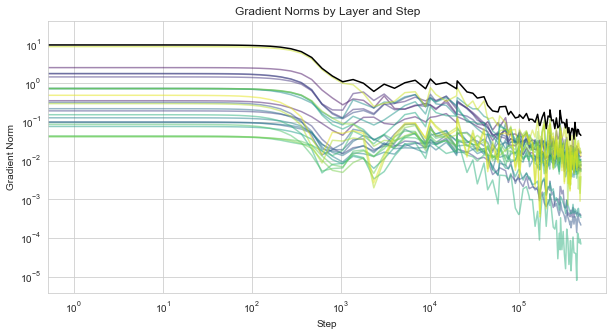

In [24]:
names = [n for n, _ in run.model.named_parameters()]

gradient_norms = pd.DataFrame([{"step": step, "value": torch.norm(g).item(), "name": n}  for step, gs in zip(steps, gradients) for n, g in zip(names, gs)])
full_gradient_norms = [(sum((g ** 2).sum() for g in gs) ** 0.5).item() for gs in gradients]

print(gradient_norms)

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=gradient_norms, x="step", y="value", hue="name", palette="viridis", ax=ax, alpha=0.5)
ax.plot(steps, full_gradient_norms, color="black", label="Full Norm")
ax.set_ylabel("Gradient Norm")
ax.set_xlabel("Step")
ax.set_title("Gradient Norms by Layer and Step")
ax.legend().remove()

# add_milestones(np.array([ax]))

ax.set_yscale("log")
ax.set_xscale("log")

# Reverse Engineering

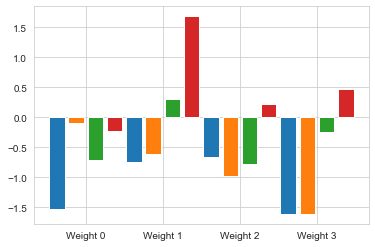

Magnitudes: [2.430724859237671, 1.982495665550232, 1.1255416870117188, 1.7794990539550781]


In [36]:
# The weights of the two tasks for reference.
tasks = run.pretrain_dist.task_distribution.tasks
num_dims = len(tasks[0])
num_tasks = len(tasks)

# Plot the two rows
for i, task in enumerate(tasks):
    plt.bar(range(i, num_tasks * num_dims, num_tasks), tasks[i].detach().cpu().numpy(), label=f'Task {i}')

plt.xticks(np.array(range(0, num_tasks * len(tasks[0]), num_tasks))+ (num_tasks - 1) / 2, [f'Weight {i}' for i in range(len(tasks[0]))])
plt.legend

plt.show()

print("Magnitudes:", [task.norm().item() for task in tasks]) 

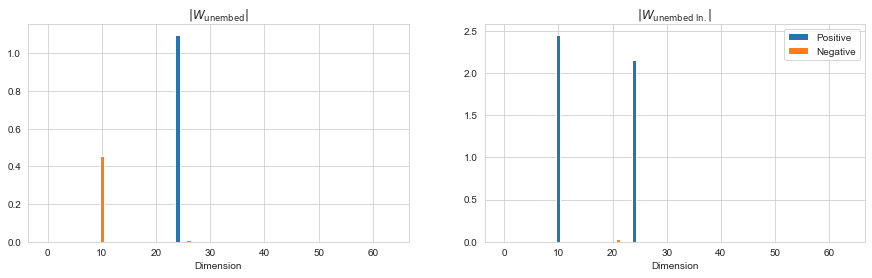

In [10]:
# Last time we had luck looking at the unembed and layer norm. Let's start there.

unembed_weights = run.model.token_sequence_transformer.unembedding[1].weight[0, :]
unembed_ln = run.model.token_sequence_transformer.unembedding[0].weight

unembed_pos_weights = unembed_weights.clone()
unembed_pos_weights[unembed_weights < 0] = 0
unembed_neg_weights = unembed_weights.clone()
unembed_neg_weights[unembed_weights > 0] = 0
unembed_neg_weights = unembed_neg_weights.abs()

unembed_pos_ln = unembed_ln.clone()
unembed_pos_ln[unembed_ln < 0] = 0
unembed_neg_ln = unembed_ln.clone()
unembed_neg_ln[unembed_ln > 0] = 0
unembed_neg_ln = unembed_neg_ln.abs()


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 4))

ax0.bar(range(len(unembed_weights)), unembed_pos_weights.detach().cpu().numpy(), label="Positive")
ax0.bar(range(len(unembed_weights)), unembed_neg_weights.detach().cpu().numpy(), label="Negative")
ax0.set_title("$|W_\mathrm{unembed}|$")
ax0.set_xlabel("Dimension")
# ax0.set_yscale("log")
# ax0.legend()

ax1.bar(range(len(unembed_ln)), unembed_pos_ln.detach().cpu().numpy(), label="Positive")
ax1.bar(range(len(unembed_ln)), unembed_neg_ln.detach().cpu().numpy(), label="Negative")
ax1.set_title("$|W_\mathrm{unembed\ ln.}|$")
ax1.set_xlabel("Dimension")
#ax1.set_yscale("log")
ax1.legend()

plt.show()


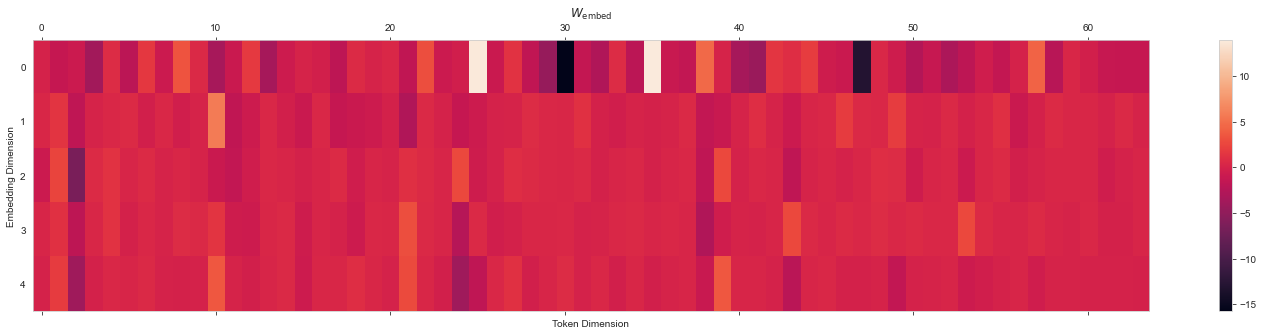

In [11]:
# Let's look at the embeddings. 

embed_weights = run.model.token_sequence_transformer.token_embedding.weight

fig, ax0 = plt.subplots(1, 1, figsize=(25, 5))

cax = ax0.matshow(embed_weights.detach().cpu().numpy().T, aspect='auto')
ax0.set_title("$W_\mathrm{embed}$")
ax0.set_xlabel("Token Dimension")
ax0.set_ylabel("Embedding Dimension")
ax0.grid(False)
fig.colorbar(cax, ax=ax0)

# ax1.bar(range(len(embed_bias)), embed_bias.detach().cpu().numpy())
# ax1.set_title("$b_\mathrm{embed}$")
# ax1.set_xlabel("Dimension")
# ax1.set_ylabel("Weight")


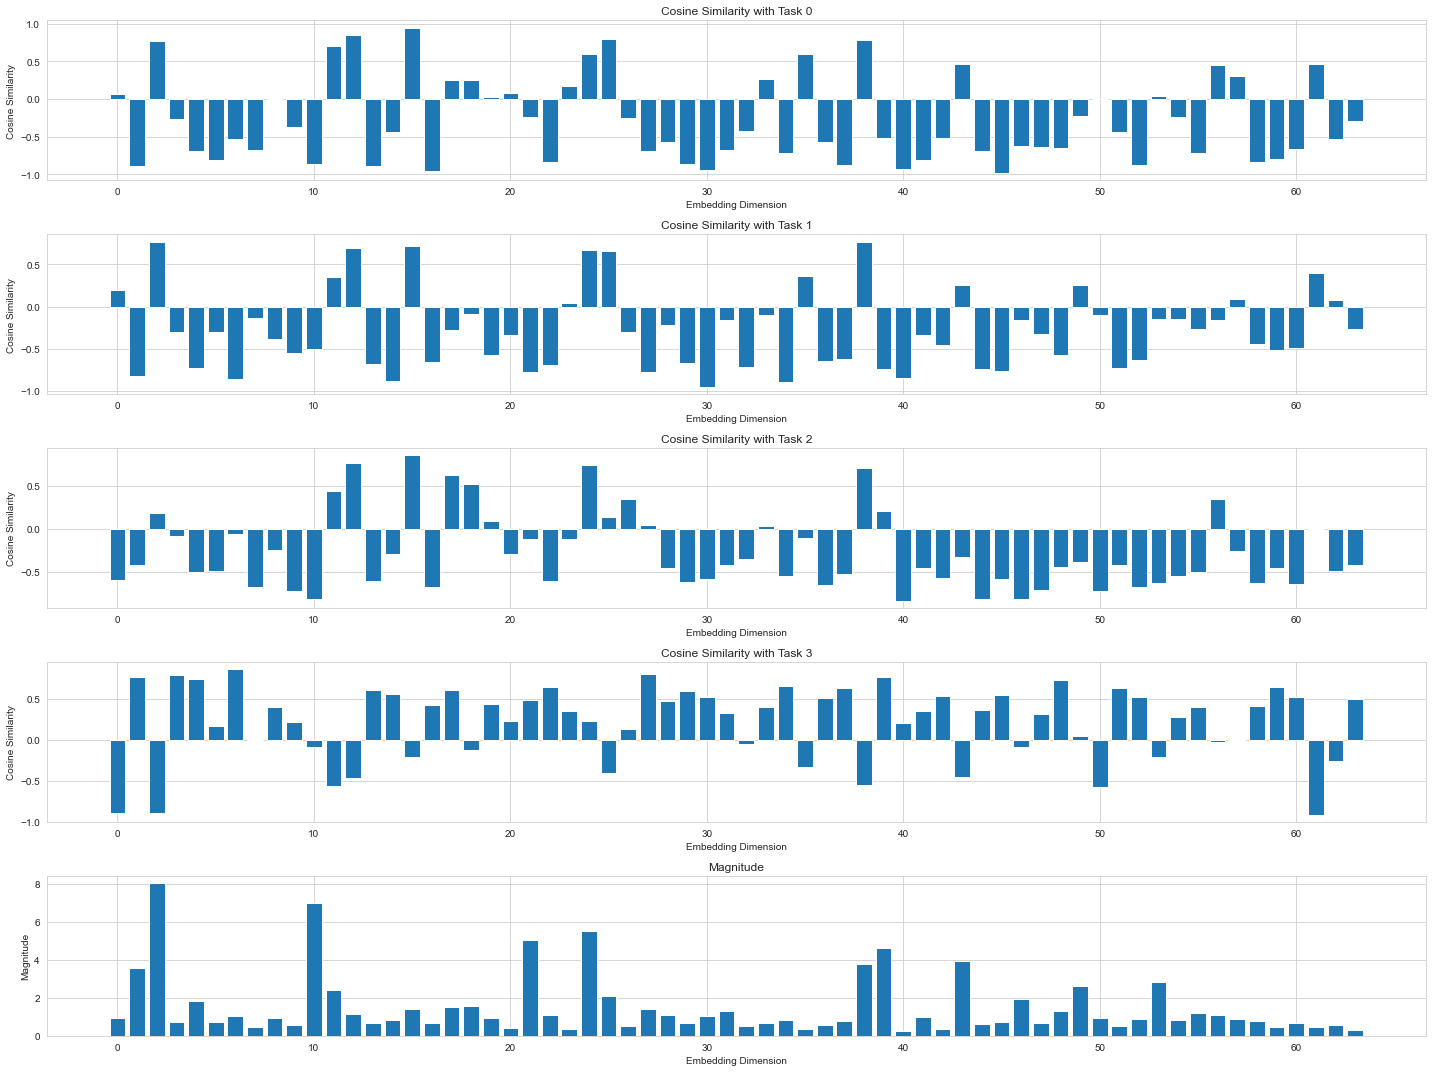

In [25]:
# - There does seem to be something interesting at index 35. That's not the only interesting thing
# - 8 and 46 appear to be opposites. 
# - There's something interesting stuff happening with the ys at 20 and 28 (positive), and 27 and 30 (negative)
# - There appear to be recurring entries, e.g., (3, 25, 33, 39, 45), (13, 22, maybe 38 and 59)

# Let's brute force this. We'll look at the cosine similarity between the x-subspace of the embeddings and the two tasks for each embedding vector. 
x_embeds = embed_weights[:, 1:]

task_cos_sims = [[] for _ in range(num_tasks)]
magnitudes = []

for x_embed in x_embeds:
    for i, task in enumerate(tasks):
        task_cos_sims[i].append(torch.cosine_similarity(x_embed.unsqueeze(0).unsqueeze(-1), task.unsqueeze(0).unsqueeze(-1)).item())
    magnitudes.append(x_embed.norm().item())

task_cos_sims = np.array(task_cos_sims)
magnitudes = np.array(magnitudes)

fig, axes = plt.subplots(num_tasks + 1, 1, figsize=(20, 15))

for i, _task_cos_sims in enumerate(task_cos_sims):
    axes[i].bar(range(len(_task_cos_sims)), _task_cos_sims)
    axes[i].set_title(f"Cosine Similarity with Task {i}")
    axes[i].set_xlabel("Embedding Dimension")
    axes[i].set_ylabel("Cosine Similarity")


last_ax = axes[-1]
last_ax.bar(range(len(magnitudes)), magnitudes, label="Magnitude")
last_ax.set_title("Magnitude")
last_ax.set_xlabel("Embedding Dimension")
last_ax.set_ylabel("Magnitude")

plt.tight_layout()
plt.show()

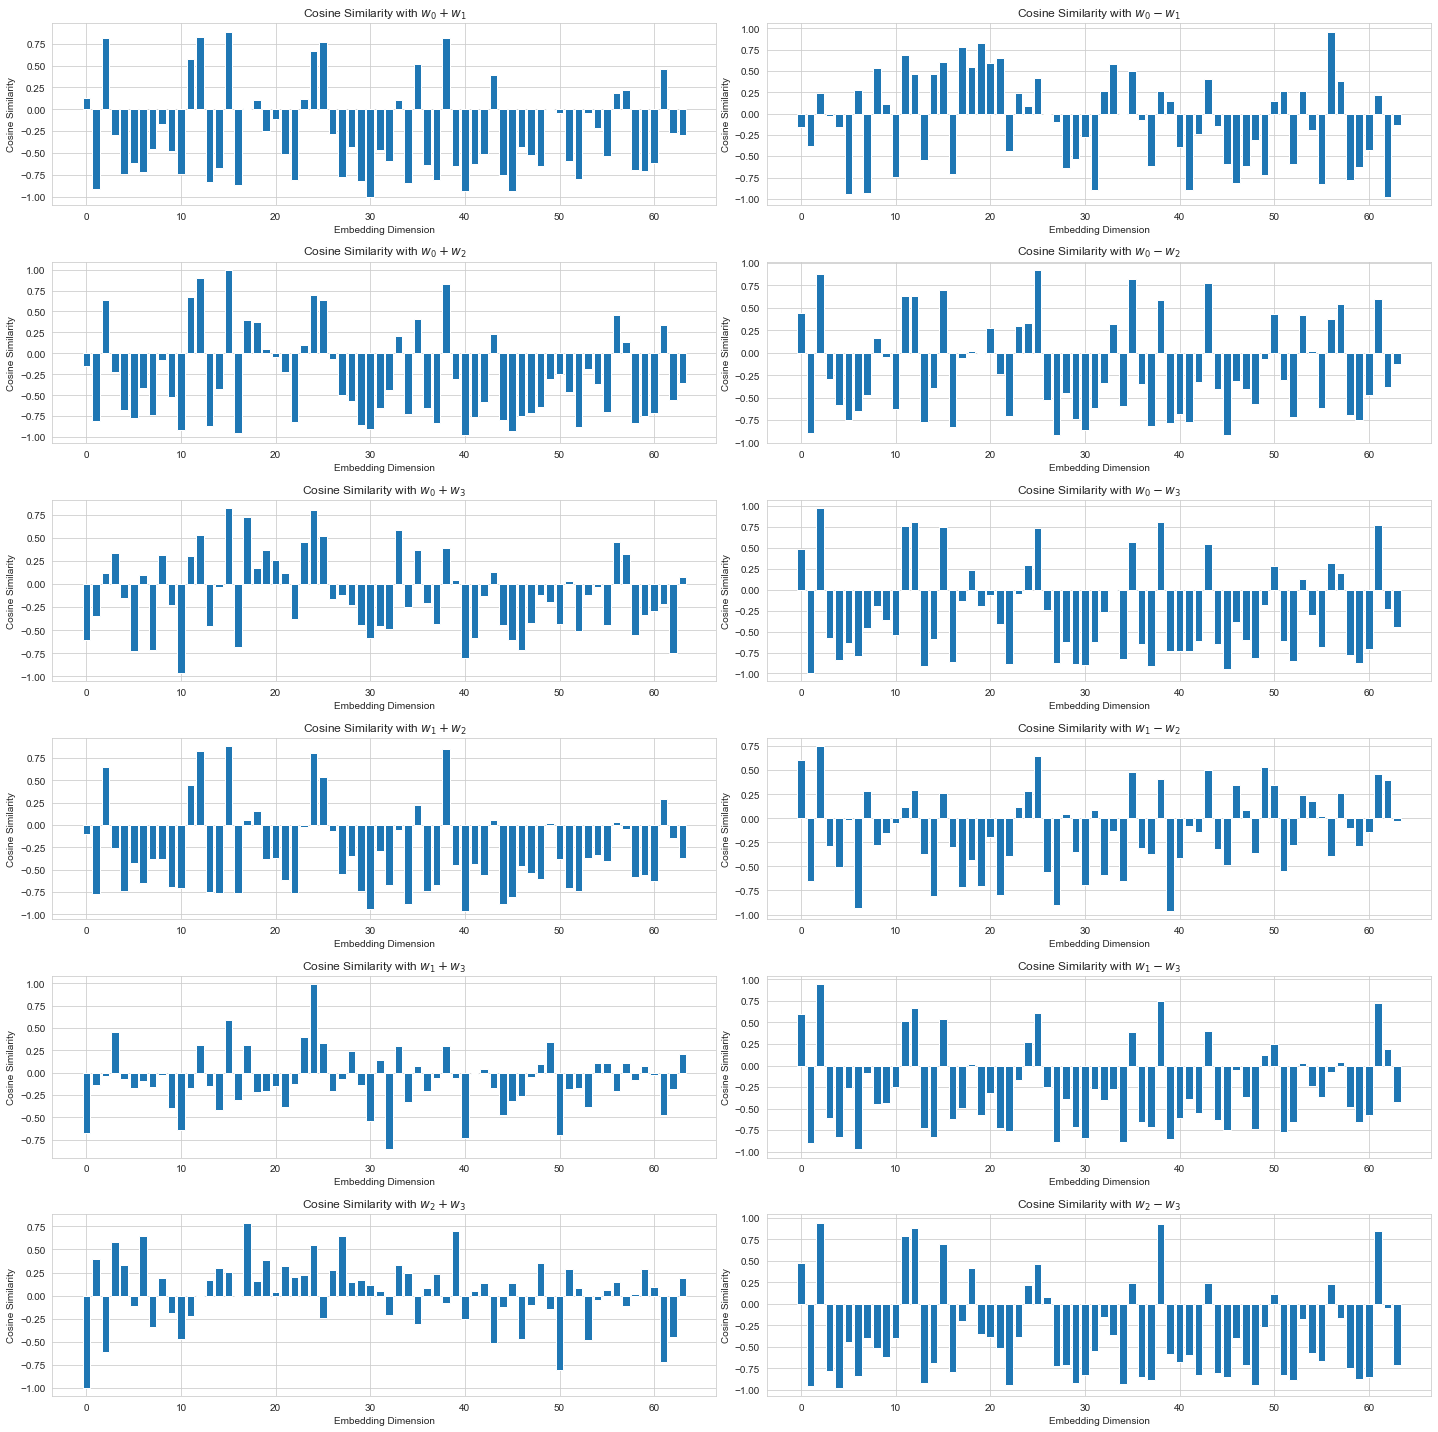

In [60]:
# Knowing what we know now from M=2, let's look about the projections onto the sums and differences of the tasks. 

# First, the two task combinations

rules_2combos = [
    (0, 1), 
    (0, 2), 
    (0, 3), 
    (1, 2),
    (1, 3),
    (2, 3)
]

task_2combos = [
    tasks[i] + (-1) ** (b) * tasks[j]
    for i, j in rules_2combos
    for b in range(2)
]

names_2combos = [
    f"{i}{'-' if b else '+'}{j}"
    for i, j in rules_2combos
    for b in range(2)
]

task_2combos = dict(zip(names_2combos, task_2combos))

labels = ["$w_0 + w_1$", "$w_0 - w_1$", "$w_0 + w_2$", "$w_0 - w_2$", "$w_0 + w_3$", "$w_0 - w_3$", "$w_1 + w_2$", "$w_1 - w_2$", "$w_1 + w_3$", "$w_1 - w_3$", "$w_2 + w_3$", "$w_2 - w_3$"]

embed_dim_explanations = {}
epsilon = 2e-2

# Sums in first column, Differences in second column. 
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

for i, (combo_name, task_combo) in enumerate(task_2combos.items()):
    task_cos_sims = []
    for x_embed in x_embeds:
        task_cos_sims.append(torch.cosine_similarity(x_embed.unsqueeze(0).unsqueeze(-1), task_combo.unsqueeze(0).unsqueeze(-1)).item())
        
    pos_indices = np.where(np.abs(np.array(task_cos_sims)) > 1 - epsilon)[0]
    embed_dim_explanations[combo_name] = pos_indices
    axes[i // 2, i % 2].bar(range(len(task_cos_sims)), task_cos_sims)
    axes[i // 2, i % 2].set_title(f"Cosine Similarity with {labels[i]}")
    axes[i // 2, i % 2].set_xlabel("Embedding Dimension")
    axes[i // 2, i % 2].set_ylabel("Cosine Similarity")

plt.tight_layout()
plt.show()

{'0+1+2': tensor([-2.3379, -1.0557, -2.4111, -3.4700], device='mps:0'),
 '0+1-2': tensor([-0.9136, -1.6631, -0.8564, -2.9671], device='mps:0'),
 '0-1+2': tensor([-2.1376,  0.1627, -0.4515, -0.2518], device='mps:0'),
 '0-1-2': tensor([-0.7133, -0.4448,  1.1031,  0.2511], device='mps:0'),
 '0+1+3': tensor([-1.8480,  0.3277, -1.4053, -2.7509], device='mps:0'),
 '0+1-3': tensor([-1.4035, -3.0465, -1.8622, -3.6862], device='mps:0'),
 '0-1+3': tensor([-1.6477,  1.5461,  0.5542,  0.4672], device='mps:0'),
 '0-1-3': tensor([-1.2032, -1.8282,  0.0974, -0.4680], device='mps:0'),
 '0+2+3': tensor([-2.4600,  1.2406, -1.2029, -1.3933], device='mps:0'),
 '0+2-3': tensor([-2.0155, -2.1336, -1.6597, -2.3286], device='mps:0'),
 '0-2+3': tensor([-1.0357,  0.6332,  0.3518, -0.8904], device='mps:0'),
 '0-2-3': tensor([-0.5912, -2.7411, -0.1051, -1.8257], device='mps:0'),
 '1+2+3': tensor([-1.0346,  1.3816, -1.5287, -1.3929], device='mps:0'),
 '1+2-3': tensor([-0.5900, -1.9926, -1.9855, -2.3282], device='m

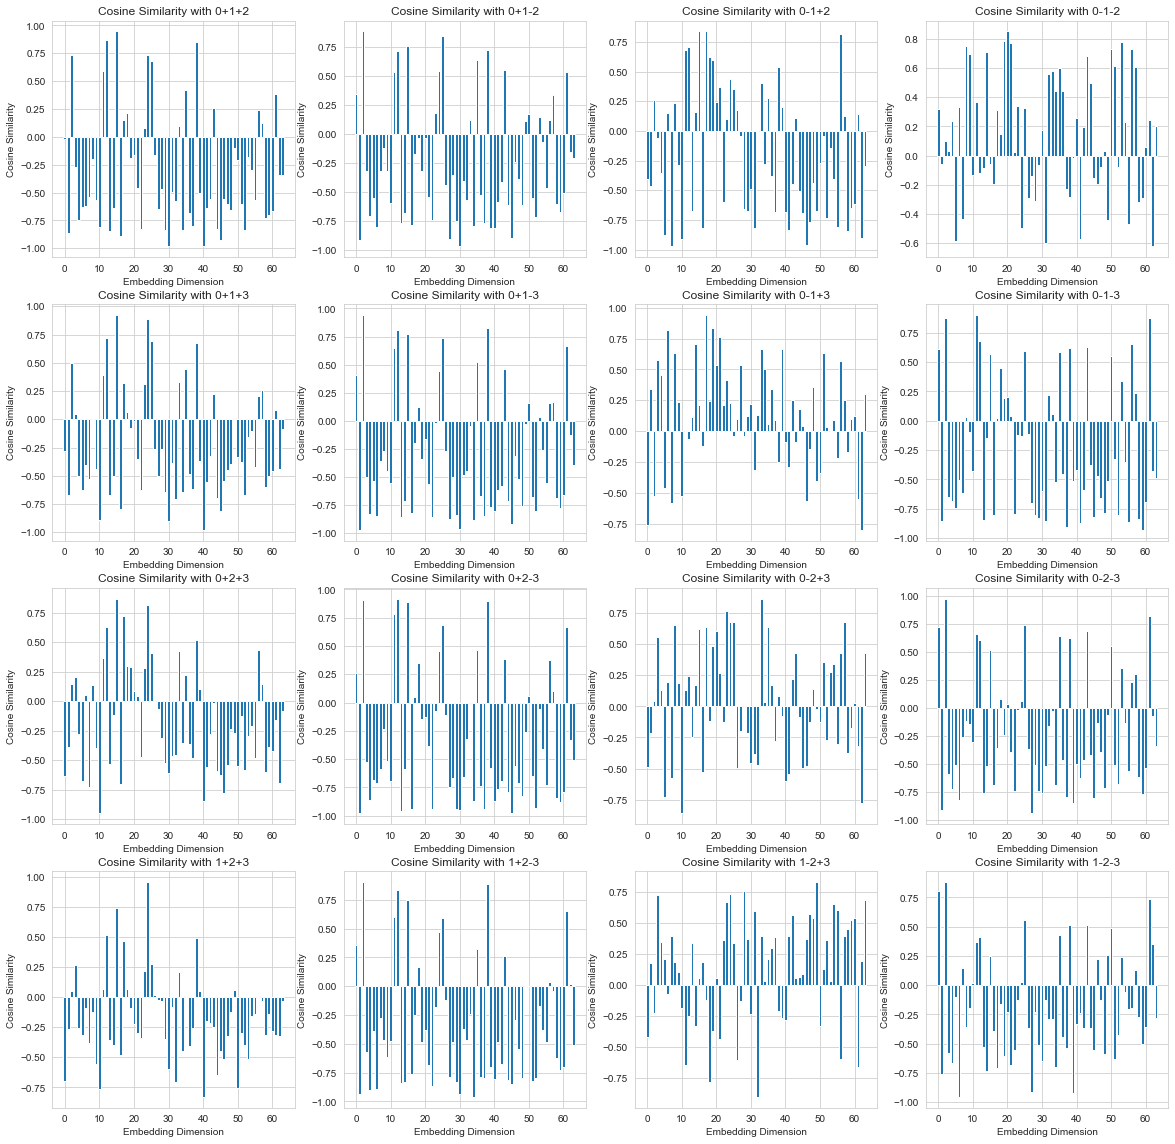

In [61]:
# Let's look at combinations of three tasks.

rules_3combos = [
    (0, 1, 2), 
    (0, 1, 3), 
    (0, 2, 3), 
    (1, 2, 3)
]

task_3combos = [
    tasks[i] + (-1) ** (b >= 2) * tasks[j] + (-1) ** (b % 2) * tasks[k] 
    for i, j, k in rules_3combos
    for b in range(4)
]

names_3combos = [
    f"{i}{'-' if b >= 2 else '+'}{j}{'-' if b % 2 else '+'}{k}"
    for i, j, k in rules_3combos
    for b in range(4)
]

task_3combos = dict(zip(names_3combos, task_3combos))
pp(task_3combos)

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, (combo_name, task_combo) in enumerate(task_3combos.items()):
    task_cos_sims = []
    for x_embed in x_embeds:
        task_cos_sims.append(torch.cosine_similarity(x_embed.unsqueeze(0).unsqueeze(-1), task_combo.unsqueeze(0).unsqueeze(-1)).item())
        
    pos_indices = np.where(np.abs(np.array(task_cos_sims)) > 1 - epsilon)[0]
    embed_dim_explanations[combo_name] = pos_indices

    axes[i // 4, i % 4].bar(range(len(task_cos_sims)), task_cos_sims)
    axes[i // 4, i % 4].set_title(f"Cosine Similarity with {combo_name}")
    axes[i // 4, i % 4].set_xlabel("Embedding Dimension")
    axes[i // 4, i % 4].set_ylabel("Cosine Similarity")

{'0+1+2+3': tensor([-2.5602,  0.6314, -2.1826, -3.0024], device='mps:0'),
 '0+1+2-3': tensor([-2.1156, -2.7428, -2.6395, -3.9377], device='mps:0'),
 '0+1-2+3': tensor([-1.1359,  0.0240, -0.6280, -2.4995], device='mps:0'),
 '0+1-2-3': tensor([-0.6913, -3.3503, -1.0849, -3.4348], device='mps:0'),
 '0-1+2+3': tensor([-2.3598,  1.8498, -0.2231,  0.2158], device='mps:0'),
 '0-1+2-3': tensor([-1.9153, -1.5244, -0.6799, -0.7195], device='mps:0'),
 '0-1-2+3': tensor([-0.9356,  1.2423,  1.3315,  0.7187], device='mps:0'),
 '0-1-2-3': tensor([-0.4910, -2.1319,  0.8747, -0.2166], device='mps:0')}


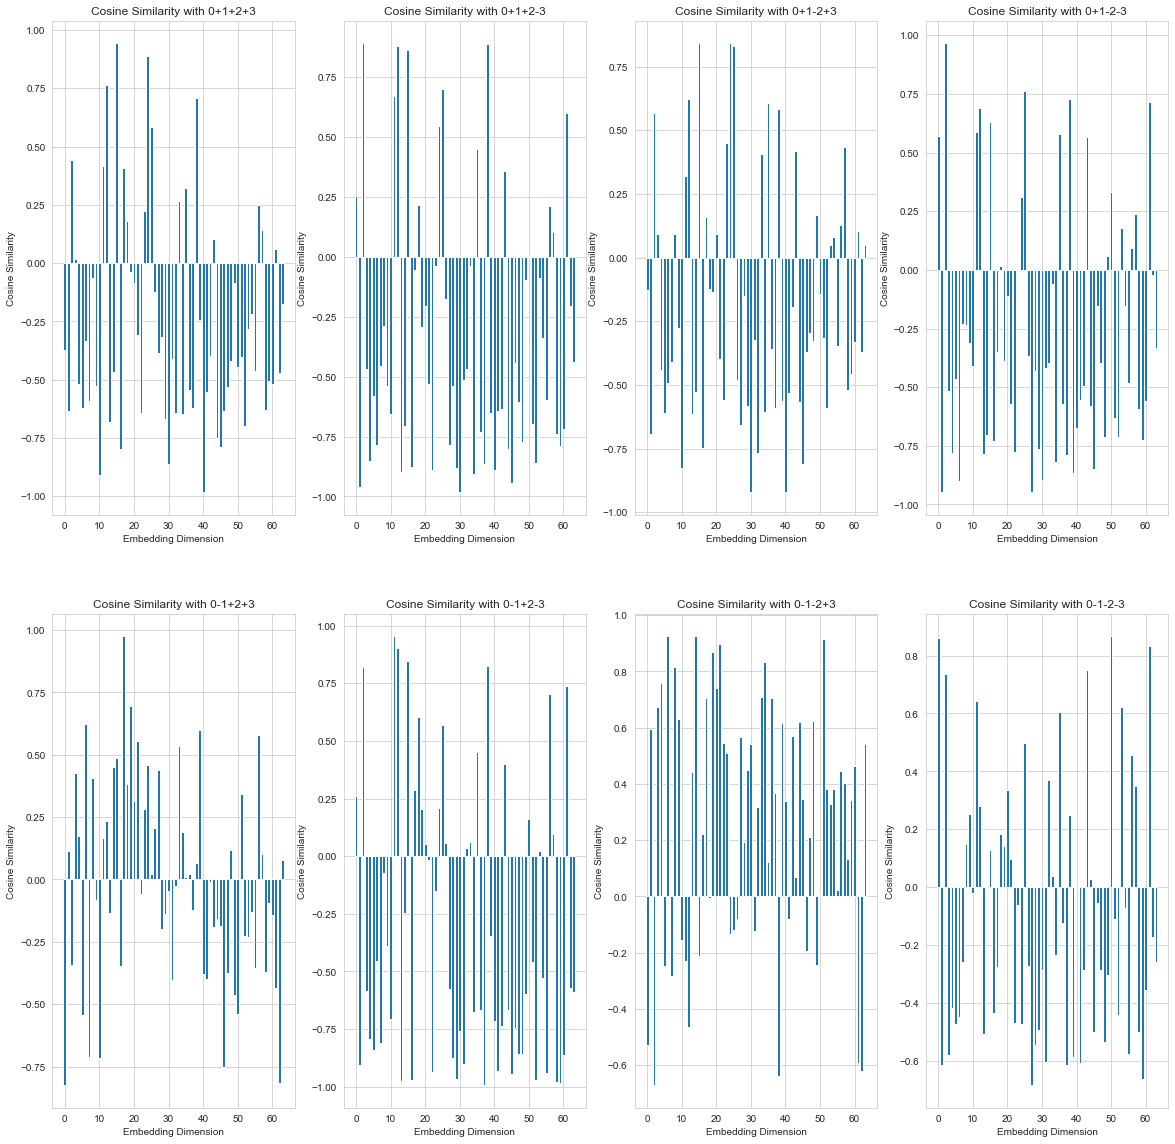

In [74]:
# Let's look at combinations of four tasks.

rules_4combos = [
    (0, 1, 2, 3), 
]

task_4combos = [
    tasks[i] + (-1) ** (b // 8) * tasks[j] + (-1) ** (b // 4) * tasks[k]  + (-1) ** (b // 2) * tasks[l]
    for i, j, k, l in rules_4combos
    for b in range(16)
]

sign = {
    -1: "-",
    1: "+"
}

names_4combos = [
    f"{i}{sign[(-1) ** (b // 8)]}{j}{sign[(-1) ** (b // 4)]}{k}{sign[(-1) ** (b // 2)]}{l}"
    for i, j, k, l in rules_4combos
    for b in range(16)
]
task_4combos = dict(zip(names_4combos, task_4combos))
pp(task_4combos)

fig, axes = plt.subplots(2, 4, figsize=(20, 20))

for i, (combo_name, task_combo) in enumerate(task_4combos.items()):
    task_cos_sims = []
    for x_embed in x_embeds:
        task_cos_sims.append(torch.cosine_similarity(x_embed.unsqueeze(0).unsqueeze(-1), task_combo.unsqueeze(0).unsqueeze(-1)).item())
        
    pos_indices = np.where(np.abs(np.array(task_cos_sims)) > 1 - epsilon)[0]
    embed_dim_explanations[combo_name] = pos_indices

    axes[i // 4, i % 4].bar(range(len(task_cos_sims)), task_cos_sims)
    axes[i // 4, i % 4].set_title(f"Cosine Similarity with {combo_name}")
    axes[i // 4, i % 4].set_xlabel("Embedding Dimension")
    axes[i // 4, i % 4].set_ylabel("Cosine Similarity")

In [75]:
# Except for 7, 46, 13, 45, 34. We've already seen these. Hm 

pp(embed_dim_explanations)
embed_dim_explanations_flat = [i for combo in embed_dim_explanations.values() for i in combo]
print("Duplicates:", [item for item, count in collections.Counter(embed_dim_explanations_flat).items() if count > 1])

{'0+1': array([30]),
 '0-1': array([], dtype=int64),
 '0+2': array([15]),
 '0-2': array([], dtype=int64),
 '0+3': array([], dtype=int64),
 '0-3': array([1]),
 '1+2': array([], dtype=int64),
 '1-2': array([], dtype=int64),
 '1+3': array([24]),
 '1-3': array([], dtype=int64),
 '2+3': array([0]),
 '2-3': array([], dtype=int64),
 '0+1+2': array([40]),
 '0+1-2': array([], dtype=int64),
 '0-1+2': array([], dtype=int64),
 '0-1-2': array([], dtype=int64),
 '0+1+3': array([], dtype=int64),
 '0+1-3': array([], dtype=int64),
 '0-1+3': array([], dtype=int64),
 '0-1-3': array([], dtype=int64),
 '0+2+3': array([], dtype=int64),
 '0+2-3': array([ 1, 45]),
 '0-2+3': array([], dtype=int64),
 '0-2-3': array([], dtype=int64),
 '1+2+3': array([], dtype=int64),
 '1+2-3': array([], dtype=int64),
 '1-2+3': array([], dtype=int64),
 '1-2-3': array([], dtype=int64),
 '0+1+2+3': array([40]),
 '0-1-2-3': array([], dtype=int64),
 '0-1-2+3': array([], dtype=int64),
 '0-1+2+3': array([], dtype=int64),
 '0+1+2-3': ar

Text(0, 0.5, 'Weight')

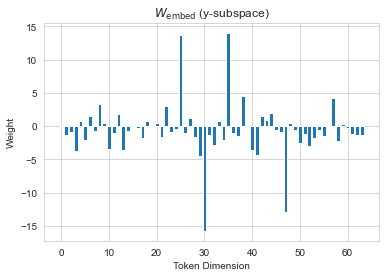

In [77]:
# Let's figure out those y encodings
plt.show()

plt.bar(range(len(embed_weights)), embed_weights.detach().cpu().numpy()[:,0])
plt.title("$W_\mathrm{embed}$ (y-subspace)")
plt.xlabel("Token Dimension")
plt.ylabel("Weight")

In [84]:
# Wherever the magniude > 6?
y_embed_dims = set(np.where(embed_weights[:, 0].abs().detach().cpu().numpy() > 7)[0])
# embed_dims = embed_dims - y_embed_dims

print(f"Y dims: {sorted(list(y_embed_dims))}")
print(f"Remaining dims: {sorted(list(embed_dims - y_embed_dims))}")

Y dims: [20, 27, 28, 30]
Remaining dims: [0, 1, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 18, 19, 24, 26, 29, 31, 32, 34, 35, 36, 37, 41, 42, 43, 44, 47, 48, 50, 51, 53, 54, 56, 57, 58, 60, 61, 62, 63]


In [52]:
# Find duplicate explanations
all_explanations = [task0_dims, task1_dims, task0_minus_task1_dims, task1_minus_task0_dims, y_embed_dims]
explanations_dict = {
    "task0": task0_dims,
    "task1": task1_dims,
    "task0_minus_task1": task0_minus_task1_dims,
    "task1_minus_task0": task1_minus_task0_dims,
    "y_embed": y_embed_dims
}

combined_explanations = task0_dims | task1_dims | task0_minus_task1_dims | task1_minus_task0_dims | y_embed_dims
duplicate_explanations = set()

for explanation in all_explanations:
    # Check elements of epxlanation that are no longer in combined_explanations
    difference = explanation - combined_explanations
    duplicate_explanations = duplicate_explanations | difference

    combined_explanations = combined_explanations & explanation

print(f"Duplicate explanations: {sorted(list(duplicate_explanations))}")

Duplicate explanations: [2, 8, 11, 12, 17, 20, 21, 23, 25, 27, 28, 30, 33, 39, 40, 45, 46, 49, 55]


<ipython-input-25-95448129ad0e>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reembedded_projections = torch.matmul(torch.tensor(projected_embeds), projection_matrix.T)


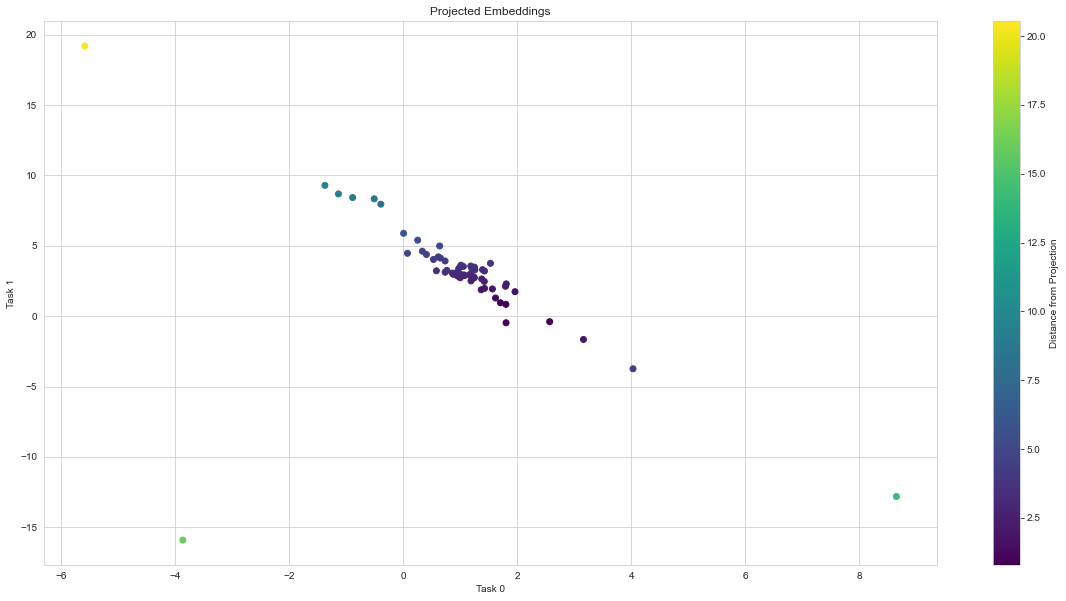

In [25]:
# Wait what I should really be doing is checking whether the embedding vectors are in the plane spanned by the tasks. If so, what are their coordinates in that plane?

projection_matrix = torch.stack([tasks[0], tasks[1]], dim=1)
projected_embeds = torch.matmul(x_embeds, projection_matrix)
reembedded_projections = torch.matmul(torch.tensor(projected_embeds), projection_matrix.T)
projected_embeds = projected_embeds.detach().cpu().numpy()

# I also want to know how far from the plane they are.
dist_from_proj = np.linalg.norm(x_embeds.detach().cpu().numpy() - reembedded_projections.detach().cpu().numpy(), axis=1)
fig, ax0 = plt.subplots(1, 1, figsize=(20, 10))

cax = ax0.scatter(projected_embeds[:, 0], projected_embeds[:, 1], c=dist_from_proj, cmap='viridis')
ax0.set_title("Projected Embeddings")
ax0.set_xlabel("Task 0")
ax0.set_ylabel("Task 1")
fig.colorbar(cax, ax=ax0, label="Distance from Projection")

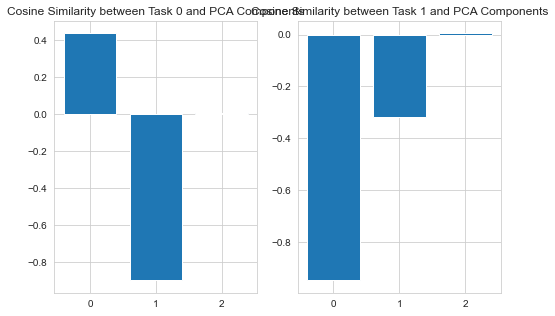

[0.77479714 0.20742752 0.00948194]


In [28]:
# I guess I should have just done the 3-component PCA from the start
from sklearn.decomposition import PCA
import plotly.graph_objects as go

pca = PCA(n_components=3)
pca_embeds = pca.fit_transform(x_embeds.detach().cpu().numpy())
dist_from_pca = np.linalg.norm(x_embeds.detach().cpu().numpy() - pca.inverse_transform(pca_embeds), axis=1)

# Create the 3D scatter plot using Plotly
fig = go.Figure(data=[
    go.Scatter3d(
        x=pca_embeds[:, 0],
        y=pca_embeds[:, 1],
        z=pca_embeds[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=dist_from_pca, 
            colorscale='Viridis', 
            colorbar=dict(title="Distance from PCA"),
            opacity=0.8
        )
    )
])

fig.update_layout(
    title="PCA Embeddings",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3"
    )
)

fig.show()

# So the first two components match the tasks. What is the third? 

# cos sims with the PCA components
task0_pca_cos_sims = []
task1_pca_cos_sims = []

for pca_comp in pca.components_:
    task0_pca_cos_sims.append(torch.cosine_similarity(torch.tensor(pca_comp, device="mps").unsqueeze(0).unsqueeze(-1), tasks[0].unsqueeze(0).unsqueeze(-1)).item())
    task1_pca_cos_sims.append(torch.cosine_similarity(torch.tensor(pca_comp, device="mps").unsqueeze(0).unsqueeze(-1), tasks[1].unsqueeze(0).unsqueeze(-1)).item())

task0_pca_cos_sims = np.array(task0_pca_cos_sims)
task1_pca_cos_sims = np.array(task1_pca_cos_sims)
task_cross_pca_cos_sims = np.abs(task0_pca_cos_sims - task1_pca_cos_sims)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 5))

ax0.bar(range(3), task0_pca_cos_sims, label="Task 0")
ax0.set_title("Cosine Similarity between Task 0 and PCA Components")

ax1.bar(range(3), task1_pca_cos_sims, label="Task 1")
ax1.set_title("Cosine Similarity between Task 1 and PCA Components")

plt.show()

print(pca.explained_variance_ratio_)


In [ ]:
# At this point, I want more than anything to see the embeddings evolve over time. Do those extremes shoot off suddenly or not at all. But I'm going to bed. 
# Nevermind I'm going to do it

In [29]:
steps = run.checkpointer.file_ids
embedding_matrices = []

for checkpoint in tqdm(run.checkpointer):
    embedding_matrices.append(checkpoint['model']['token_sequence_transformer.token_embedding.weight'])


In [44]:
frames = []

for step, embed in zip(steps, embedding_matrices):
    _x_embeds = embed[:, 1:].to("mps")
    projection_matrix = torch.stack([tasks[0], tasks[1]], dim=1)
    projected_embeds = torch.matmul(_x_embeds, projection_matrix)
    reembedded_projections = torch.matmul(torch.tensor(projected_embeds), projection_matrix.T)
    projected_embeds = projected_embeds.detach().cpu().numpy()
    dist_from_proj = np.linalg.norm(_x_embeds.detach().cpu().numpy() - reembedded_projections.detach().cpu().numpy(), axis=1)
    
    frame = go.Frame(
        data=[
            go.Scatter(
                x=projected_embeds[:, 0],
                y=projected_embeds[:, 1],
                mode='markers',
                marker=dict(
                    color=dist_from_proj, 
                    colorscale='Viridis', 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=0.8
                )
            )
        ],
        name=str(step)
    )
    frames.append(frame)
    
# Calculate differences between successive steps for timing
diff_steps = [steps[i+1] - steps[i] for i in range(len(steps)-1)]
diff_steps.append(diff_steps[-1])  # Append the last difference for the last step

# Create steps for the slider
slider_steps = []
for i, step in enumerate(steps):
    step_duration = diff_steps[i] * 10  # Convert to milliseconds
    step_dict = {
        "args": [
            [str(step)],
            {
                "frame": {"duration": step_duration, "redraw": True},
                "mode": "immediate",
                "transition": {"duration": 10},
            },
        ],
        "label": str(step),
        "method": "animate",
    }
    slider_steps.append(step_dict)

fig = go.Figure(
    data=frames[0]['data'],
    layout=go.Layout(
        title="Projected Embeddings",
        updatemenus=[dict(type='buttons', showactive=True, buttons=[dict(label='Play', method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])])],
        sliders=[{"active": 0, "yanchor": "top", "xanchor": "left", "currentvalue": {"font": {"size": 20}, "prefix": "Step:", "visible": True, "xanchor": "right"}, "pad": {"b": 10, "t": 50}, "len": 0.9, "x": 0.1, "y": 0, "steps": slider_steps}],
        xaxis_title="Task 0",
        yaxis_title="Task 1",
        xaxis=dict(range=[-25, 25]),
        yaxis=dict(range=[-25, 25]),
        width=1200,  
        height=1200   
    ),
    frames=frames
)

fig.show()



<ipython-input-44-0df96dad6c1c>:7: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



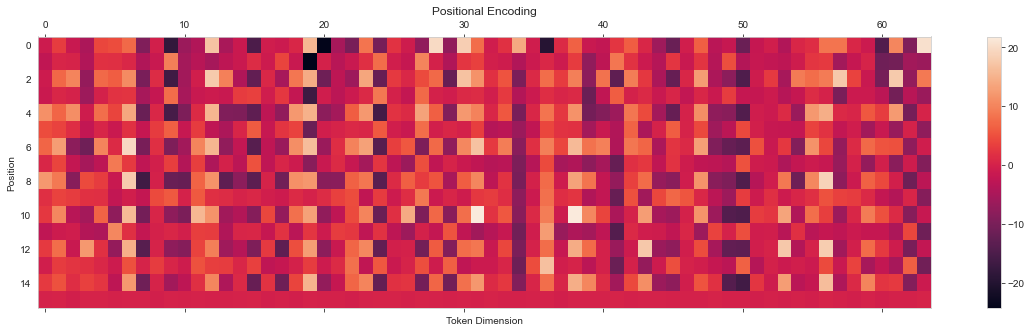

In [50]:
# Remember that the ys are also being embedded with a slight negative value. 

# Next day. Running, simplified hypothesis is something like:
# - The model embeds w_0^T x, w_1^T x, (w_0 - w_1)^T x, and y. 
# - With the QK matrix it computes C * ((w_0-w_1)^T x - y) and its negation (for some large C). 
# - With the softmax it decides which of the tasks is present. 
# - Then it copies the appropriate prediction to the prediction dimension. 

# Looking at the activation animations, it looks like the model only has to look at the first y dimension. 
# The tasks don't span the x subspace, so you only need to see one input & output to determine which you have.

# What's the positional encoding doing?

pos_enc = run.model.token_sequence_transformer.postn_embedding.weight  # No bias

fig, ax0 = plt.subplots(1, 1, figsize=(20, 5))

cax = ax0.matshow(pos_enc.detach().cpu().numpy().T, aspect='auto')
ax0.set_title("Positional Encoding")
ax0.set_xlabel("Token Dimension")
ax0.set_ylabel("Position")
ax0.grid(False)
fig.colorbar(cax, ax=ax0)


[38, 13, 52, 22, 59, 30, 33, 2, 39, 8, 40, 11, 12, 45, 17, 49, 21, 55, 23, 25, 27, 46, 8, 25, 2, 33, 20, 23, 27, 28, 30]


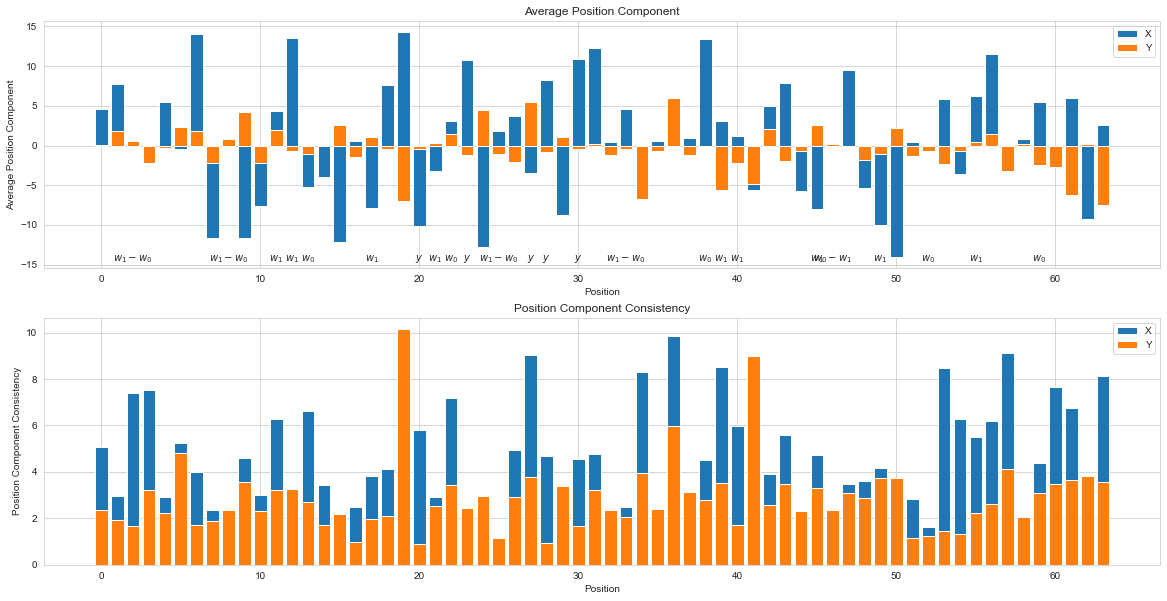

In [63]:
# It looks like the positional encoding is mainly distinguishing xs and ys. I don't obviously see much of a distinction between earlier and later layers. 
# Let's confirm this. 

# The average of the x and y activations
x_focus_scores = []
y_focus_scores = []

# How much deviation within each
x_focus_consistencies = []
y_focus_consistencies = []

for i, pos_vec in enumerate(pos_enc):
    x_focus_scores.append(pos_vec[0::2].mean().item())
    y_focus_scores.append(pos_vec[1::2].mean().item())
    x_focus_consistencies.append(pos_vec[0::2].std().item())
    y_focus_consistencies.append(pos_vec[1::2].std().item())

x_focus_scores = np.array(x_focus_scores)
y_focus_scores = np.array(y_focus_scores)
x_focus_consistencies = np.array(x_focus_consistencies)
y_focus_consistencies = np.array(y_focus_consistencies)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 10))

bars_x = ax0.bar(range(len(x_focus_scores)), x_focus_scores, label="X")
ax0.bar(range(len(y_focus_scores)), y_focus_scores, label="Y")


print([i for key, idxs in explanations_dict.items() for i in idxs])
rev_explanations_dict = {i: key for key, idxs in explanations_dict.items() for i in idxs}

labels = {
    "task0": "$w_0$",
    "task1": "$w_1$",
    "task0_minus_task1": "$w_0-w_1$",
    "task1_minus_task0": "$w_1-w_0$",
    "y_embed": "$y$"
}

# Add labels to ax0
for i, bar in enumerate(bars_x):
    if i in rev_explanations_dict:
        ax0.text(bar.get_x() + bar.get_width() / 2,- 15, labels[rev_explanations_dict[i]], ha='center', va='bottom')

ax0.set_title("Average Position Component")
ax0.set_xlabel("Position")
ax0.set_ylabel("Average Position Component")
ax0.legend()

ax1.bar(range(len(x_focus_consistencies)), x_focus_consistencies, label="X")
ax1.bar(range(len(y_focus_consistencies)), y_focus_consistencies, label="Y")

ax1.set_title("Position Component Consistency")
ax1.set_xlabel("Position")
ax1.set_ylabel("Position Component Consistency")
ax1.legend()

plt.show()

In [68]:
# Let's come back to this. 
# Looking at the embedding projection again, almost all embedding vectors can be characterized by a single number (where they sit on the line between (~6, 20) and (9, -13). There is a sole exception sitting orthogonal to the line.

# Let's first get the endpoints of the line

# Find the point closest to -6, 20
task_line_endpoint0 = projected_embeds[np.argmin(np.linalg.norm(projected_embeds - np.array([-6, 20]), axis=1))]

# Find the point closest to 9, -13
task_line_endpoint1 = projected_embeds[np.argmin(np.linalg.norm(projected_embeds - np.array([9, -13]), axis=1))]

# Find the orthogonal point close to -15, -4
task_line_orthogonal = projected_embeds[np.argmin(np.linalg.norm(projected_embeds - np.array([-15, -4]), axis=1))]


print(task_line_endpoint0, task_line_endpoint1, task_line_orthogonal)

# Reembed these points
task_line_endpoint0 = torch.matmul(torch.tensor(task_line_endpoint0, device="mps"), projection_matrix.T).detach().cpu().numpy()
task_line_endpoint1 = torch.matmul(torch.tensor(task_line_endpoint1, device="mps"), projection_matrix.T).detach().cpu().numpy()
task_line_orthogonal = torch.matmul(torch.tensor(task_line_orthogonal, device="mps"), projection_matrix.T).detach().cpu().numpy()


# Find the points closest to these in the original embedding

task_line_endpoint0 = x_embeds[np.argmin(np.linalg.norm(x_embeds.detach().cpu().numpy() - task_line_endpoint0, axis=1))]
task_line_endpoint1 = x_embeds[np.argmin(np.linalg.norm(x_embeds.detach().cpu().numpy() - task_line_endpoint1, axis=1))]
task_line_orthogonal = x_embeds[np.argmin(np.linalg.norm(x_embeds.detach().cpu().numpy() - task_line_orthogonal, axis=1))]

print(task_line_endpoint0, task_line_endpoint1, task_line_orthogonal)

# Let's find the indices of these dimensions
task_line_endpoint0_idx = np.argmin(np.linalg.norm(embed_weights[:, 1:].detach().cpu().numpy() - task_line_endpoint0.detach().cpu().numpy(), axis=1))
task_line_endpoint1_idx = np.argmin(np.linalg.norm(embed_weights[:, 1:].detach().cpu().numpy() - task_line_endpoint1.detach().cpu().numpy(), axis=1))
task_line_orthogonal_idx = np.argmin(np.linalg.norm(embed_weights[:, 1:].detach().cpu().numpy() - task_line_orthogonal.detach().cpu().numpy(), axis=1))

print(task_line_endpoint0_idx, task_line_endpoint1_idx, task_line_orthogonal_idx)

[-5.5896606 19.206326 ] [  8.652351 -12.810981] [ -3.8689451 -15.907846 ]
tensor([ -6.3892,  -2.1992, -10.5283,  -0.2057], device='mps:0',
       grad_fn=<SelectBackward0>) tensor([7.3945, 3.1929, 6.8730, 4.0009], device='mps:0',
       grad_fn=<SelectBackward0>) tensor([-1.1320, -0.2851,  9.3529, -5.8280], device='mps:0',
       grad_fn=<SelectBackward0>)
8 46 35


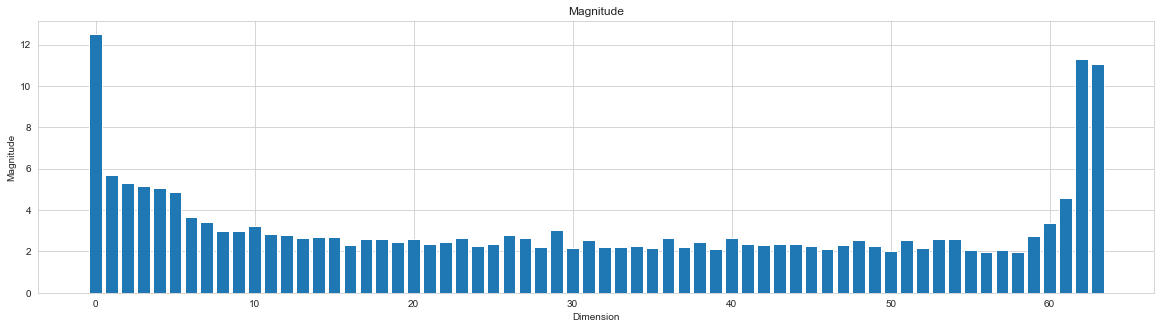

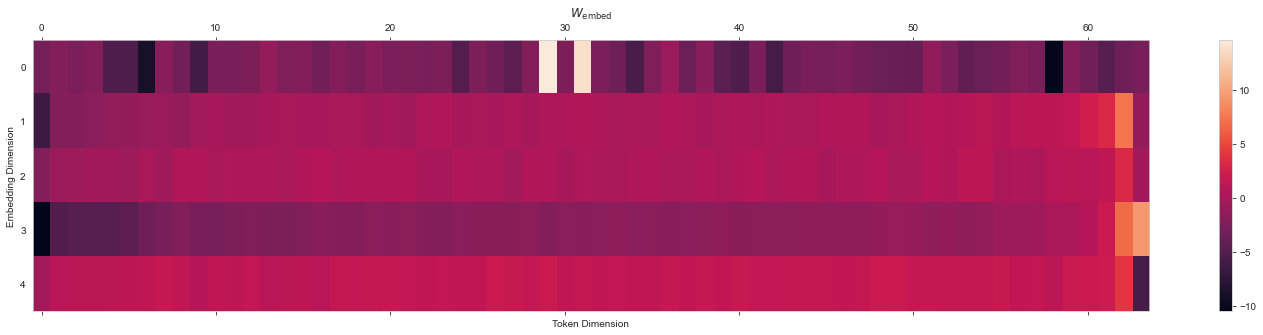

In [80]:
# Excellent. Let's use this to reorder the embedding dimension by how far they are along the line. We'll put the orthogonal component (the prediction track) at the end.

# Find the projection of each embedding vector onto the line
task_line_vec = task_line_endpoint1 - task_line_endpoint0
task_line_vec_np = task_line_vec.detach().cpu().numpy()

# Find the projection of each embedding vector onto the line
embed_vecs_1d = embed_weights[:, 1:].detach().cpu().numpy()
embed_vecs_1d = embed_vecs_1d @ task_line_vec_np / np.linalg.norm(task_line_vec_np)

# Find the order of components
task_line_ordering = np.argsort(embed_vecs_1d)

# Find where 35 is in this array and move it to the end
task_line_ordering = np.concatenate([task_line_ordering[task_line_ordering != 35], [35]])

# Let's plot magnitudes in this order

fig, ax0 = plt.subplots(1, 1, figsize=(20, 5))

ax0.bar(range(len(embed_weights)), magnitudes[task_line_ordering])
ax0.set_title("Magnitude")
ax0.set_xlabel("Dimension")
ax0.set_ylabel("Magnitude")

plt.show()


In [333]:
# (Later) What's the slope of this line? 
limit_y = 

tensor(32.0173, device='mps:0', grad_fn=<DotBackward0>) tensor(-14.2420, device='mps:0', grad_fn=<DotBackward0>) tensor(-2.2481, device='mps:0', grad_fn=<DivBackward0>)


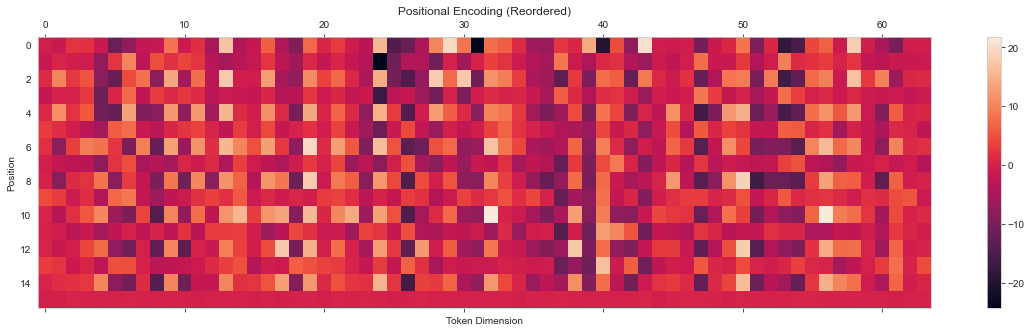

[38, 13, 52, 22, 59, 30, 33, 2, 39, 8, 40, 11, 12, 45, 17, 49, 21, 55, 23, 25, 27, 46, 8, 25, 2, 33, 20, 23, 27, 28, 30]


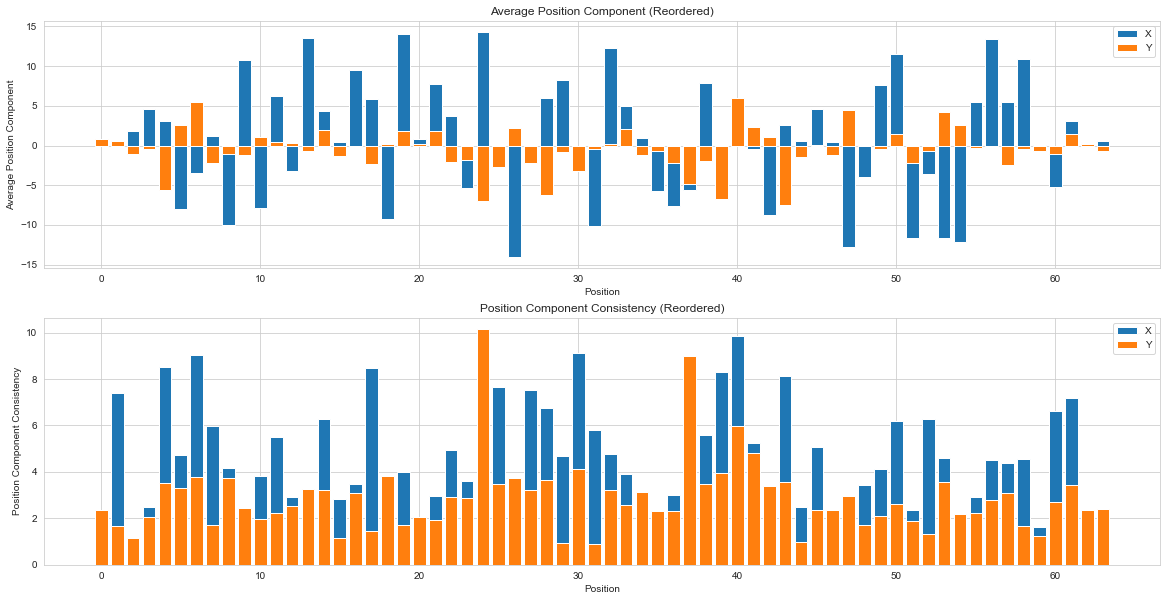

In [75]:
# Let's show positional embeddings in this order

# It looks like the positional encoding is mainly distinguishing xs and ys. I don't obviously see much of a distinction between earlier and later layers. 
# Let's confirm this. 

fig, ax0 = plt.subplots(1, 1, figsize=(20, 5))

cax = ax0.matshow(pos_enc[task_line_ordering, :].detach().cpu().numpy().T, aspect='auto')
ax0.set_title("Positional Encoding (Reordered)")
ax0.set_xlabel("Token Dimension")
ax0.set_ylabel("Position")
ax0.grid(False)
fig.colorbar(cax, ax=ax0)

plt.show()


fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 10))

bars_x = ax0.bar(range(len(x_focus_scores)), x_focus_scores[task_line_ordering], label="X")
ax0.bar(range(len(y_focus_scores)), y_focus_scores[task_line_ordering], label="Y")


print([i for key, idxs in explanations_dict.items() for i in idxs])
rev_explanations_dict = {i: key for key, idxs in explanations_dict.items() for i in idxs}

ax0.set_title("Average Position Component (Reordered)")
ax0.set_xlabel("Position")
ax0.set_ylabel("Average Position Component")
ax0.legend()

ax1.bar(range(len(x_focus_consistencies)), x_focus_consistencies[task_line_ordering], label="X")
ax1.bar(range(len(y_focus_consistencies)), y_focus_consistencies[task_line_ordering], label="Y")

ax1.set_title("Position Component Consistency (Reordered)")
ax1.set_xlabel("Position")
ax1.set_ylabel("Position Component Consistency")
ax1.legend()

plt.show()

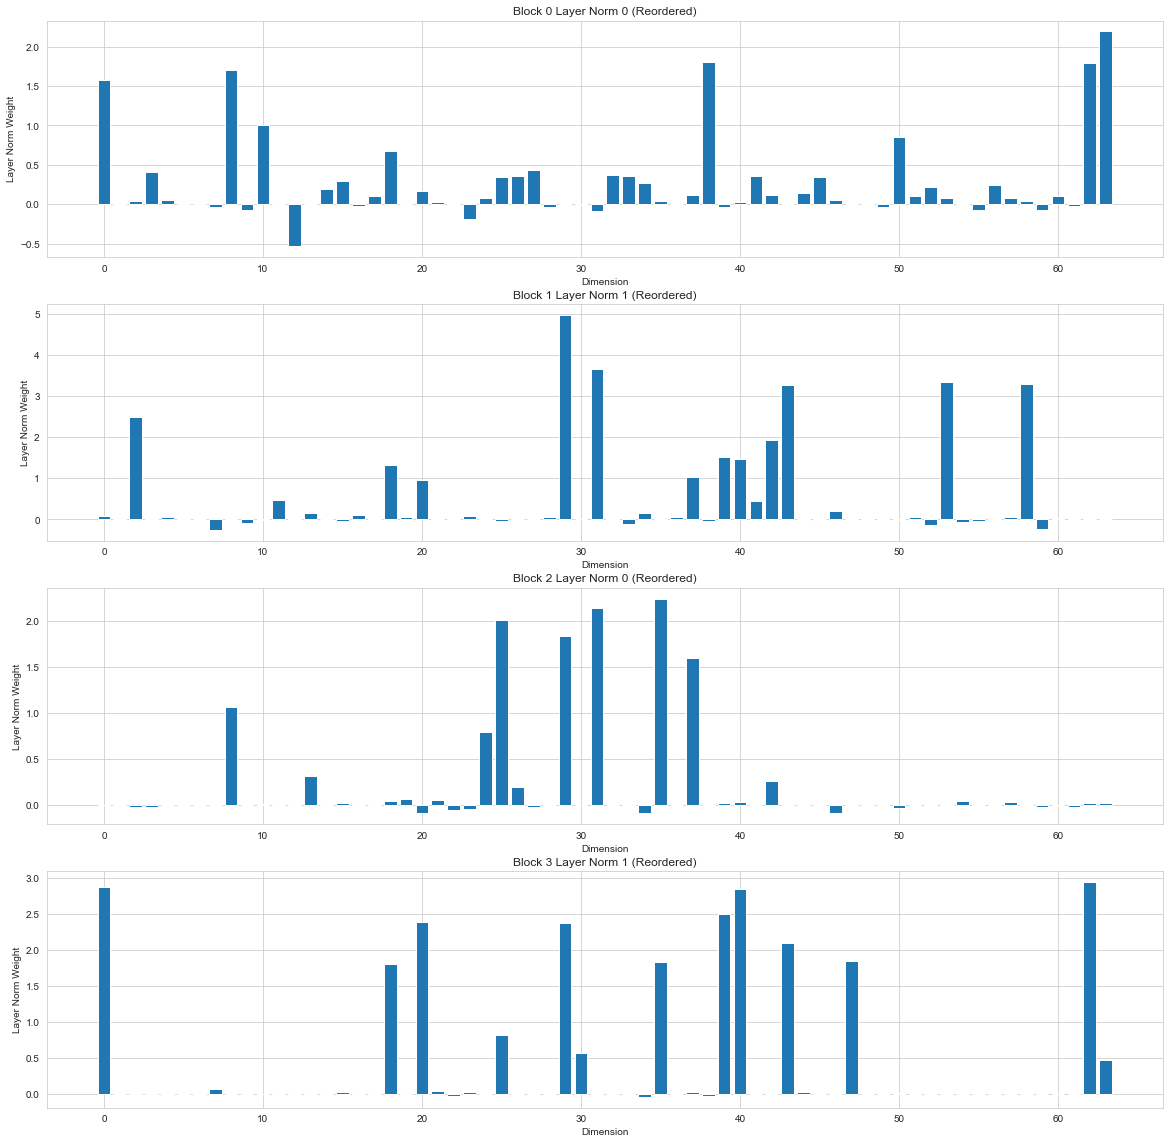

In [79]:
# I think we'll have better luck looking somewhere else for now. 
# Looking at the animations, I'm going to look at the second block layer norms which look especially clean.

block0_ln0 = run.model.token_sequence_transformer.blocks[0].layer_norms[0].weight
block0_ln1 = run.model.token_sequence_transformer.blocks[0].layer_norms[1].weight
block1_ln0 = run.model.token_sequence_transformer.blocks[1].layer_norms[0].weight
block1_ln1 = run.model.token_sequence_transformer.blocks[1].layer_norms[1].weight

lns = [block0_ln0, block0_ln1, block1_ln0, block1_ln1]

# Bar chart

fig, axes = plt.subplots(4, 1, figsize=(20, 20))


for i, (ax, ln) in enumerate(zip(axes, lns)):
    b, l = i // 2, i % 2
    ax.bar(range(len(ln)), ln[task_line_ordering].detach().cpu().numpy())
    ax.set_title(f"Block {i} Layer Norm {l} (Reordered)")
    ax.set_xlabel("Dimension")
    ax.set_ylabel("Layer Norm Weight")

plt.show()


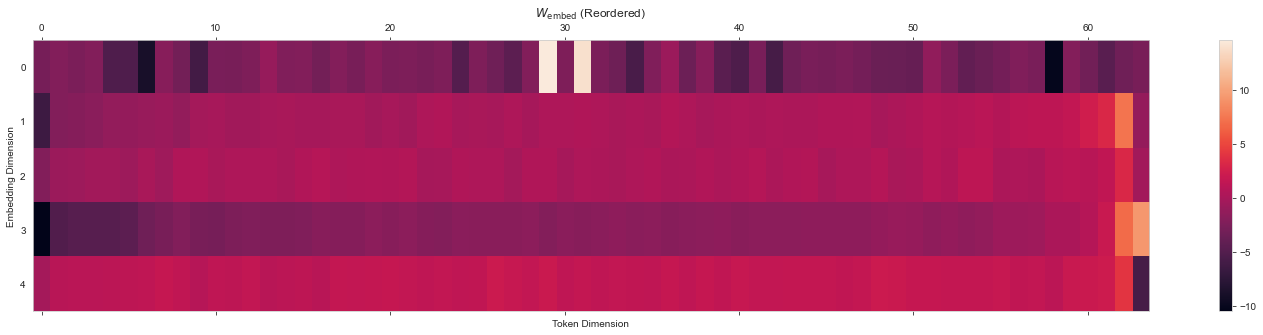

In [86]:
# We forgot to reorder the embedding matrix

fig, ax0 = plt.subplots(1, 1, figsize=(25, 5))

cax = ax0.matshow(embed_weights[task_line_ordering, :].detach().cpu().numpy().T, aspect='auto')
ax0.set_title("$W_\mathrm{embed}$ (Reordered)")
ax0.set_xlabel("Token Dimension")
ax0.set_ylabel("Embedding Dimension")
ax0.grid(False)
fig.colorbar(cax, ax=ax0)

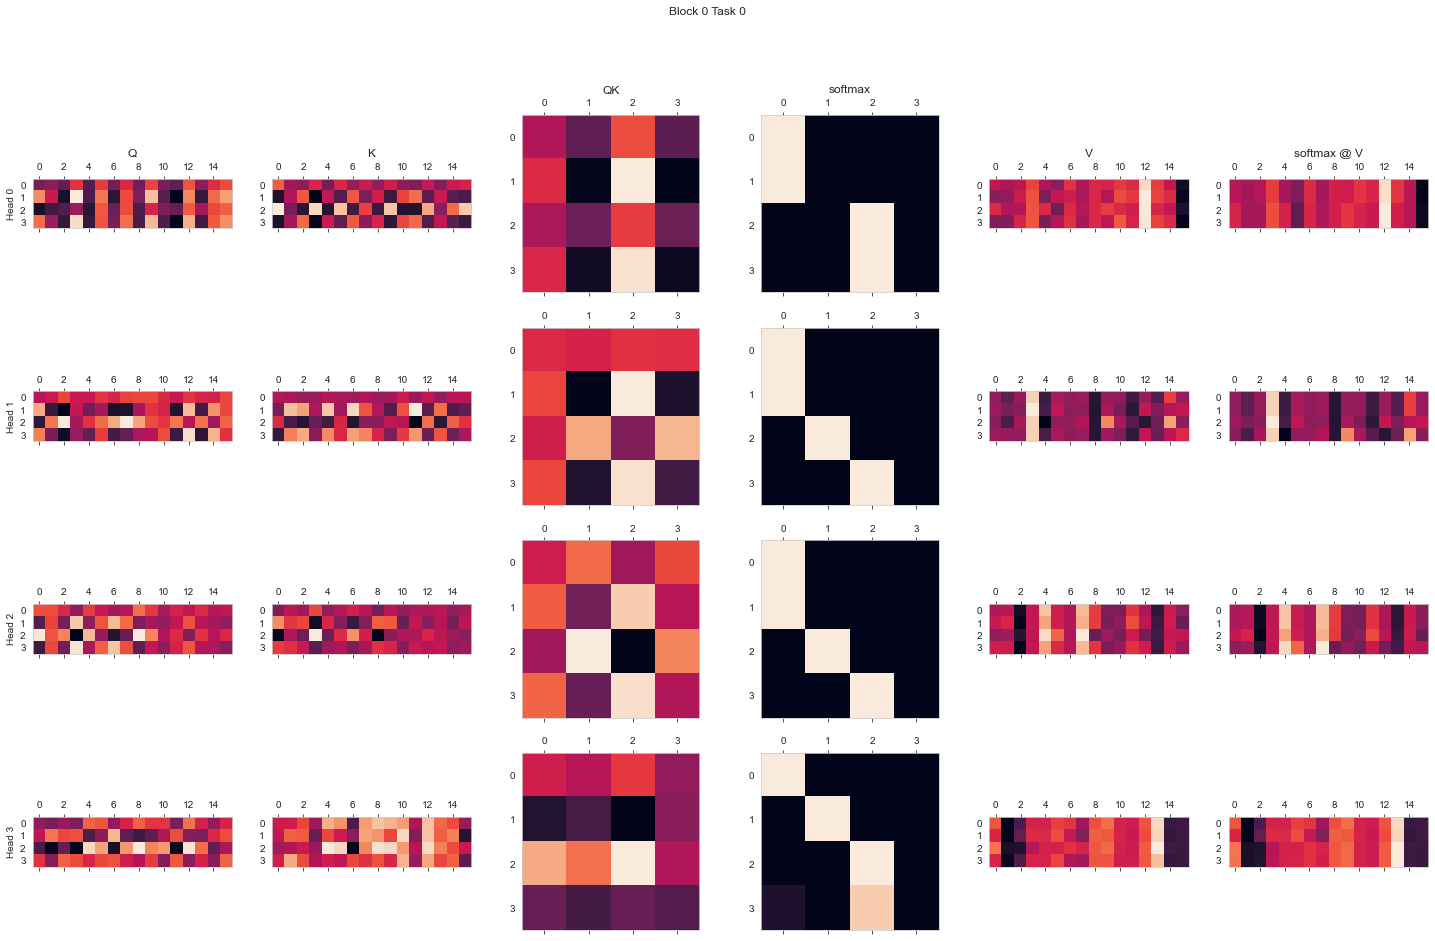

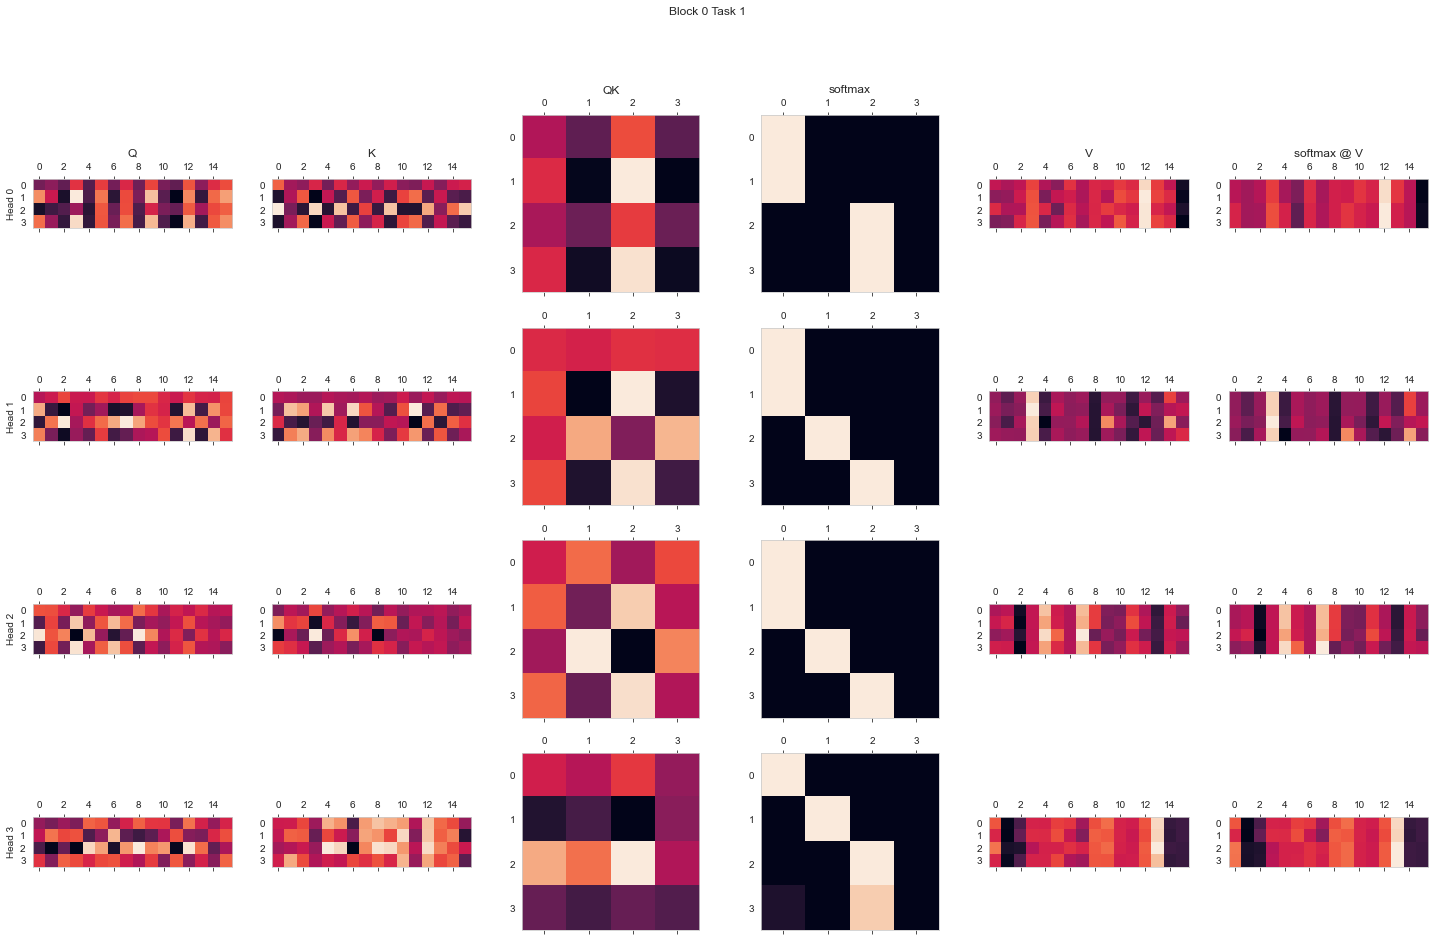

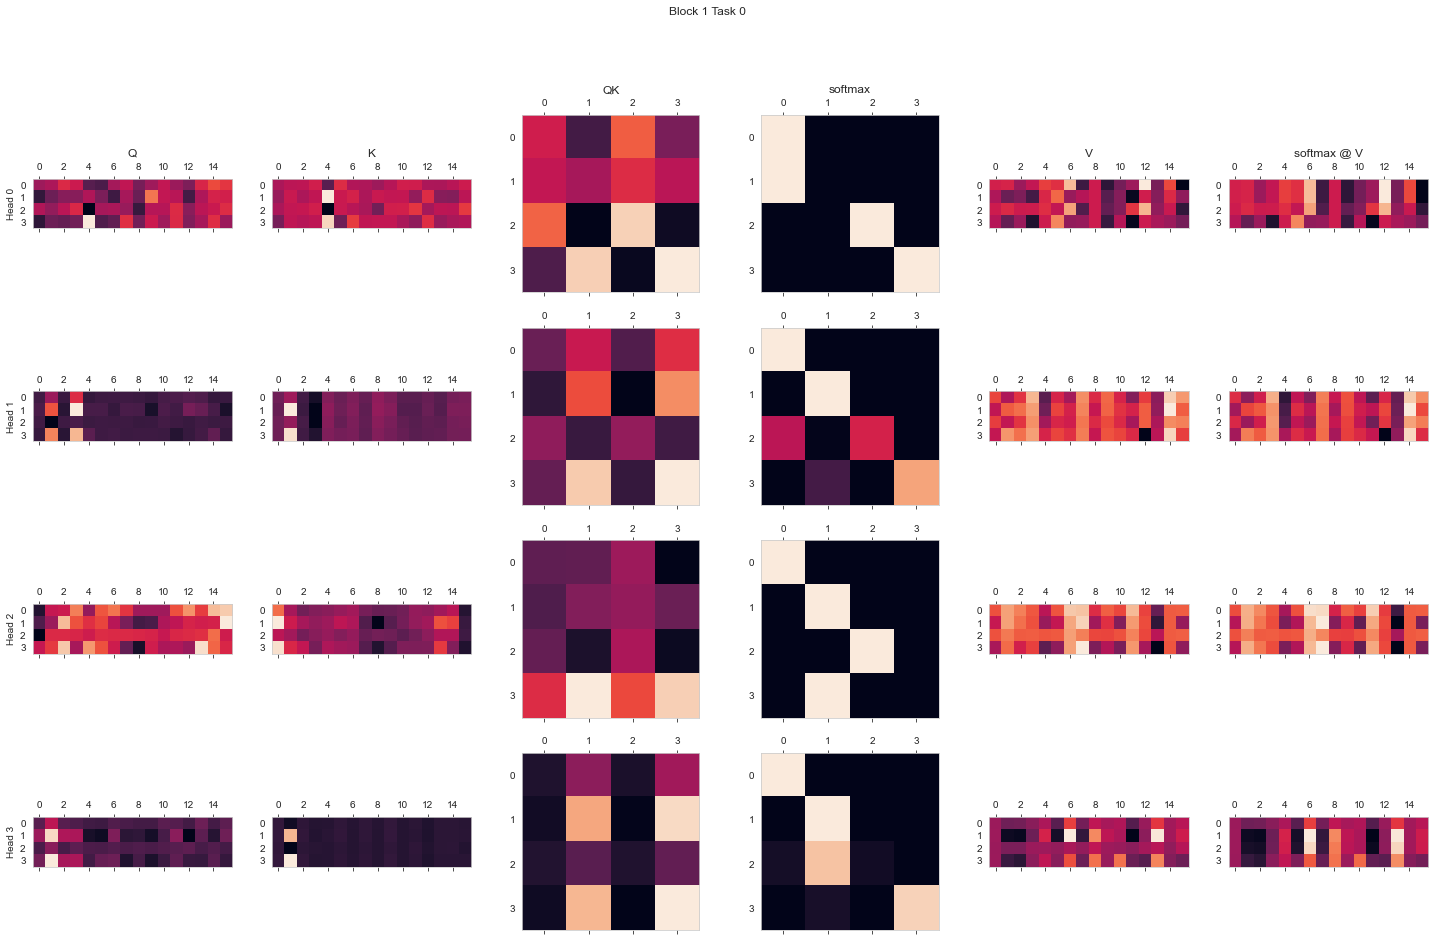

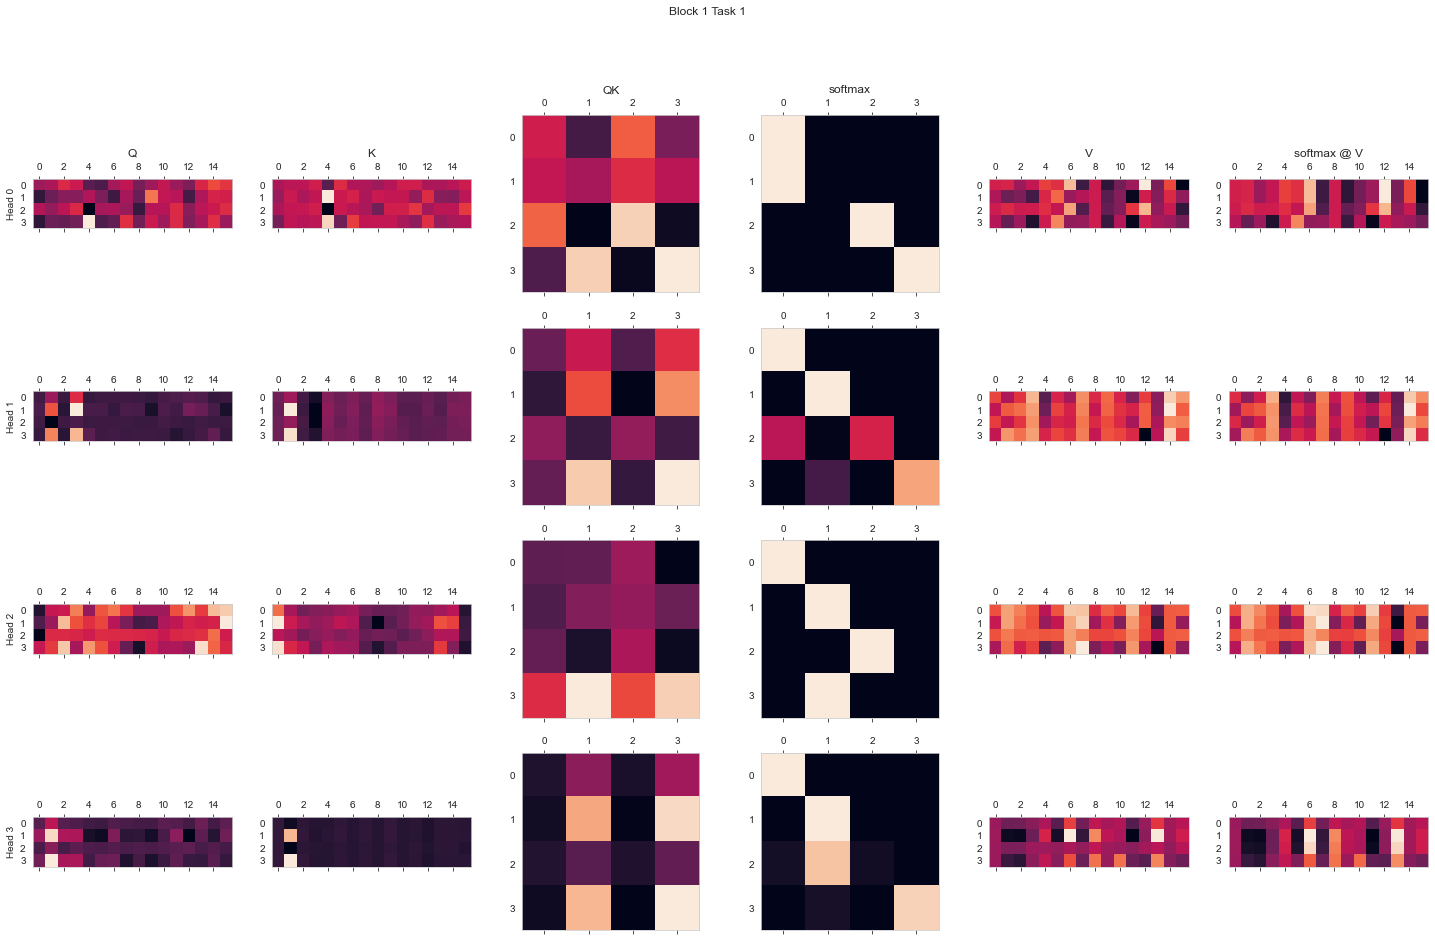

In [109]:
from typing import Optional

def separate_attention(qkv, num_heads, batch_size, head_size, num_tokens):
    return (qkv.view(batch_size, num_tokens, num_heads, 3*head_size)
            .transpose(-2, -3)
            .split(head_size, dim=-1))

def plot_matrix(ax, data, title: Optional[str] = None):
    ax.matshow(data.detach().to("cpu").numpy())
    ax.grid(None)

    if title is not None:
        ax.set_title(title)

def plot_attention(axs, data, titles, num_heads):
    q, k, softmax, v  = data
    qk = (q.unsqueeze(0) @ k.unsqueeze(0).transpose(-2, -1))[0]

    softmax_v = softmax @ v

    # Rows for each head
    # Columns for Q, K, QK, V
    for j, (name, x) in enumerate(zip(titles, [q, k, qk, softmax, v, softmax_v])):
        axs[0, j].set_title(name)

        for h in range(num_heads):
            plot_matrix(axs[h, j], x[h])

    for h in range(num_heads):
        axs[h, 0].set_ylabel(f"Head {h}")


for b in range(2):
    for i, activations in enumerate([activations0, activations1]):
        fig, axes = plt.subplots(4, 6, figsize=(25, 15))
        softmax = activations[f"token_sequence_transformer.blocks.{b}.attention.attention_softmax"]
        q, k, v = separate_attention(activations[f"token_sequence_transformer.blocks.{b}.attention.attention"], 4, 1, 16, 4)
        attn = [q[0], k[0], softmax[0], v[0]]
        plot_attention(axes, attn, ["Q", "K", "QK", "softmax", "V", "softmax @ V"], num_heads=4)
        plt.suptitle(f"Block {b} Task {i}")

In [385]:
from torchtyping import TensorType

# The important observation is that the attention patterns don't depend on the task. There's no decision-making going on here.
# We've got a previous x-head (b0h0) and previous-token heads (b0h{1,2}) and weirder things. 

# My guess is that the main function here is to carry information from ys to xs. It's not suprising that the previous-token head b0h1 forms first. 

# I want to have a better idea of how the model's internal representations are changing. If I take a basis of R^4. And pass these as my x, then I can 
# do the same dimensionality reduction I did on the embedding weights to track how the representation changes with depth. 


TOKEN_IDX = -2

def get_representation_evolution(model, w: torch.Tensor, x0: torch.Tensor):
    _hooked_model = hook(model)
    basis = torch.eye(4, device="mps") * 1.
    # basis[1:, 1:] = 0.
    #basis[0, 0] = 0.
    #basis[2:, 2:] = 0.
    # basis[:,:] = 0.

    y0 = w @ x0

    activations_per_basis = []

    for x in basis:
        y = w @ x

        xs = torch.stack([x0, x]).unsqueeze(0)
        ys = torch.stack([y0, y]).unsqueeze(0).unsqueeze(-1)

        _activations = _hooked_model.run_with_cache(xs, ys)[1]
        
        activations_per_basis.append({
            "embed": _activations["token_sequence_transformer.token_embedding"],
            "attn0": _activations["token_sequence_transformer.blocks.0.resid_after_attn"],
            "mlp0":  _activations["token_sequence_transformer.blocks.0"],
            "attn1": _activations["token_sequence_transformer.blocks.1.resid_after_attn"],
            "mlp1":  _activations["token_sequence_transformer.blocks.1"],
            "ln": _activations["token_sequence_transformer.unembedding.0"],
        })

    # Stack them back together

    return [
        torch.stack([a["embed"] for a in activations_per_basis]),
        torch.stack([a["attn0"] for a in activations_per_basis]),
        torch.stack([a["mlp0"] for a in activations_per_basis]),
        torch.stack([a["attn1"] for a in activations_per_basis]),
        torch.stack([a["mlp1"] for a in activations_per_basis]),
        torch.stack([a["ln"] for a in activations_per_basis]),        
    ]

basis = torch.eye(4, device="mps")
task0_evoln = get_representation_evolution(run.model, tasks[0], basis[0])
task1_evoln = get_representation_evolution(run.model, tasks[1], basis[1])

def reduce_evoln(evolution: List[TensorType["dim_x", "batch_size", "num_tokens", "dim_embed"]], token_idx=TOKEN_IDX):
    evolution = [e[:,0, token_idx, :] for e in evolution]

    for i in range(len(evolution)):
        mean_i = evolution[i].mean(dim=1)
        new_evolution = torch.zeros((4, 66), device="mps")
        new_evolution[:, :64] = evolution[i]
        new_evolution[:, 64] = mean_i
        new_evolution[:, 65] = evolution[i][:, 35] - mean_i # prediction
        evolution[i] = new_evolution
        
    evoln_embedded = [torch.matmul(e.T, projection_matrix) for e in evolution]
    evoln_reembed = [torch.matmul(e, projection_matrix.T).T for e in evoln_embedded]
    evolution_with_distances = [(e_em, (e-e_rem).norm(dim=0).abs().detach().cpu().numpy()) for e_em, e_rem, e in zip(evoln_embedded, evoln_reembed, evolution)]

    return evolution_with_distances

task0_evoln = reduce_evoln(task0_evoln)
task1_evoln = reduce_evoln(task1_evoln)

In [319]:
TASK_IDX = 0
DEFAULT_LAYER = 0
task_evoln = task0_evoln if TASK_IDX == 0 else task1_evoln
print(task_evoln[0][0].shape)

torch.Size([66, 2])


In [327]:
# I'd like to distinguish:
# - 35 (the readout tape)
# - The initial task line limits [8 46]
# - The y inputs Negatives: [27, 30], Positives: [20, 28]
COLORSCALE = "viridis"

special_indexes = {
    "readout": [35],
    "task-limits": [8, 46],
    "negative-ys": [27, 30],
    "positive-ys": [20, 28],
    "max-dist": [np.argmax(task0_evoln[0][1])],
    "mean": [64],
    "mean-minus-prediction": [65]
}
print("MAX DIST:", special_indexes["max-dist"])

symbol_map = {
    'readout': 'triangle-up',
    'task-limits': 'cross',
    'negative-ys': 'diamond',
    'positive-ys': 'square',
    'max-dist': 'triangle-down',
    "mean": 'star',
    "mean-minus-prediction": 'star-square'
}

symbols = ['circle'] * task0_evoln[0][0].shape[0]  # default shape
sizes = [5.] * task0_evoln[0][0].shape[0]  # default size
opacities = [0.5] * task0_evoln[0][0].shape[0]  # default opacity

for category, indexes in special_indexes.items():
    for idx in indexes:
        symbols[idx] = symbol_map[category]
        sizes[idx] = 15
        opacities[idx] = .8


frames = []
for i, (tensor, dist) in enumerate(task0_evoln):
    x = tensor[:, 0].tolist()
    y = tensor[:, 1].tolist()

    frame = go.Frame(
        data=[
            go.Scatter(
                x=x, 
                y=y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=dist.tolist(), 
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )
    ],
        name=f"Frame {i}"
    )

    frames.append(frame)

# Initialize with the first frame
init_x = task0_evoln[DEFAULT_LAYER][0][:, 0].tolist()
init_y = task0_evoln[DEFAULT_LAYER][0][:, 1].tolist()
init_dist = task0_evoln[DEFAULT_LAYER][1]

fig = go.Figure(
    data=[go.Scatter(
                x=init_x, 
                y=init_y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=init_dist,
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )],
    layout=go.Layout(
        sliders=[{
            'steps': [
                {
                    'args': [[f'Frame {i}'], {'frame': {'duration': 100, 'redraw': True}}],
                    'label': str(i),
                    'method': 'animate',
                } for i, _ in enumerate(frames)
            ],
        }],
        xaxis_title="Task 0",
        yaxis_title="Task 1",
        xaxis=dict(range=[-25, 25], autorange=True),
        yaxis=dict(range=[-25, 25], autorange=True),
        width=1200,  
        height=1200   
    ),
    frames=frames,
)

fig.show()

MAX DIST: [8]


In [328]:
frames = []
for i, (tensor, dist) in enumerate(task0_evoln):
    x = tensor[:, 0].tolist()
    y = tensor[:, 1].tolist()

    frame = go.Frame(
        data=[
            go.Scatter(
                x=x, 
                y=y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=dist.tolist(), 
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )
    ],
        name=f"Frame {i}"
    )

    frames.append(frame)

# Initialize with the first frame
init_x = task0_evoln[DEFAULT_LAYER][0][:, 0].tolist()
init_y = task0_evoln[DEFAULT_LAYER][0][:, 1].tolist()
init_dist = task0_evoln[DEFAULT_LAYER][1]

fig = go.Figure(
    data=[go.Scatter(
                x=init_x, 
                y=init_y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=init_dist,
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )],
    layout=go.Layout(
        sliders=[{
            'steps': [
                {
                    'args': [[f'Frame {i}'], {'frame': {'duration': 300, 'redraw': True}}],
                    'label': str(i),
                    'method': 'animate',
                } for i, _ in enumerate(frames)
            ],
        }],
        xaxis_title="Task 0",
        yaxis_title="Task 1",
        xaxis=dict(range=[-25, 25], autorange=True),
        yaxis=dict(range=[-25, 25], autorange=True),
        width=1200,  
        height=1200   
    ),
    frames=frames,
)

fig.show()

In [220]:
# Okay. I stared at this for a while. 
# The most obvious thing is the stretching along the task line. As in the M=1 case, we're blowing up the activation variance, probably to circumvent the LN. 
# It's not totally consistent stretching. There are sign flips (though they appear to be balanced against each other).
# E.g.: 
# - the negative y encodings (diamonds) and positive y encodings (squares) almost trade inside/outside positions at 1.
# - the positive y encodings swap quadrants twice

# The decision seems to be made in the last MLP (3->4). Before then, regardless of the task, the readout tape (up-triangle) is moving along the task 1 axis. 
# After the MLP, the readout tape is oriented along the correct task axis. 

# What is up with embedding 0? Did I accidentally shuffle indices somewhere?


# Okay let's look at where the last MLP ln is reading from (i.e., where weights > 1. in magnitude)


# The important observation is that the attention patterns don't depend on the task. There's no decision-making going on here.
# We've got a previous x-head (b0h0) and previous-token heads (b0h{1,2}) and weirder things. 

# My guess is that the main function here is to carry information from ys to xs. It's not suprising that the previous-token head b0h1 forms first. 

# I want to have a better idea of how the model's internal representations are changing. If I take a basis of R^4. And pass these as my x, then I can 
# do the same dimensionality reduction I did on the embedding weights to track how the representation changes with depth. 

# I'd like to distinguish:
# - 35 (the readout tape)
# - The initial task line limits [8 46]
# - The y inputs Negatives: [27, 30], Positives: [20, 28]

symbols = ['circle'] * len(x)  # default shape
sizes = [5.] * len(x)  # default size
opacities = [0.5] * len(x)  # default opacity

for category, indexes in special_indexes.items():
    for idx in indexes:
        symbols[idx] = symbol_map[category]
        sizes[idx] = 10.
        opacities[idx] = 1.

    if idx in special_indexes["max-dist"]:
        sizes[idx] = 20.


ln_importance = (block1_ln1.abs() / block1_ln1.abs().max()).detach().cpu().numpy()

frames = []
for i, (tensor, dist) in enumerate(task0_evoln):
    x = tensor[:, 0].tolist()
    y = tensor[:, 1].tolist()

    frame = go.Frame(
        data=[
            go.Scatter(
                x=x, 
                y=y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=5 +ln_importance * 20,
                    color=ln_importance, 
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="LN weight in final MLP"),
                    opacity=ln_importance
                )
        )
    ],
        name=f"Frame {i}"
    )

    frames.append(frame)

fig = go.Figure(
    data=[go.Scatter(
                x=init_x, 
                y=init_y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=5 +ln_importance * 20,
                    color=ln_importance,
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="LN weight in final MLP"),
                    opacity=ln_importance
                )
        )],
    layout=go.Layout(
        sliders=[{
            'steps': [
                {
                    'args': [[f'Frame {i}'], {'frame': {'duration': 300, 'redraw': True}}],
                    'label': str(i),
                    'method': 'animate',
                } for i, _ in enumerate(frames)
            ],
        }],
        xaxis_title="Task 0",
        yaxis_title="Task 1",
        xaxis=dict(range=[-25, 25], autorange=True),
        yaxis=dict(range=[-25, 25], autorange=True),
        width=1200,  
        height=1200   
    ),
    frames=frames,
)

fig.show()

In [82]:
len(models)

96

In [238]:
task_evolns_over_training = []

for model in models:
    _task_evoln = get_representation_evolution(model, tasks[TASK_IDX], basis[0])
    _task_evoln = reduce_evoln(_task_evoln)
    task_evolns_over_training.append(_task_evoln)

In [239]:
CHECKPOINT = -3
task0_evoln = task_evolns_over_training[CHECKPOINT]

In [ ]:
frames = []
for i, (tensor, dist) in enumerate(task0_evoln):
    x = tensor[:, 0].tolist()
    y = tensor[:, 1].tolist()

    frame = go.Frame(
        data=[
            go.Scatter(
                x=x, 
                y=y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=dist.tolist(), 
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )
    ],
        name=f"Frame {i}"
    )

    frames.append(frame)

# Initialize with the first frame
init_x = task0_evoln[0][0][:, 0].tolist()
init_y = task0_evoln[0][0][:, 1].tolist()
init_dist = task0_evoln[0][1]

fig = go.Figure(
    data=[go.Scatter(
                x=init_x, 
                y=init_y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=init_dist,
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )],
    layout=go.Layout(
        sliders=[{
            'steps': [
                {
                    'args': [[f'Frame {i}'], {'frame': {'duration': 300, 'redraw': True}}],
                    'label': str(i),
                    'method': 'animate',
                } for i, _ in enumerate(frames)
            ],
        }],
        xaxis_title="Task 0",
        yaxis_title="Task 1",
        xaxis=dict(range=[-25, 25], autorange=True),
        yaxis=dict(range=[-25, 25], autorange=True),
        width=1200,  
        height=1200   
    ),
    frames=frames,
)

fig.show()

In [241]:
LAYER = 2

In [ ]:
frames = []
for i, task_evoln in enumerate(task_evolns_over_training):
    tensor, dist = task_evoln[LAYER]
    x = tensor[:, 0].tolist()
    y = tensor[:, 1].tolist()

    frame = go.Frame(
        data=[
            go.Scatter(
                x=x, 
                y=y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=dist.tolist(), 
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )
    ],
        name=f"Frame {i}"
    )

    frames.append(frame)

# Initialize with the first frame
init_x = task_evolns_over_training[0][0][0][:, 0].tolist()
init_y = task_evolns_over_training[0][0][0][:, 1].tolist()
init_dist = task_evolns_over_training[0][0][1]

fig = go.Figure(
    data=[go.Scatter(
                x=init_x, 
                y=init_y, 
                mode='markers',
                marker=dict(
                    symbol=symbols,
                    size=sizes,
                    color=init_dist,
                    colorscale=COLORSCALE, 
                    colorbar=dict(title="Distance from Projection"),
                    opacity=opacities
                )
        )],
    layout=go.Layout(
        sliders=[{
            'steps': [
                {
                    'args': [[f'Frame {i}'], {'frame': {'duration': 100, 'redraw': True}}],
                    'label': str(i),
                    'method': 'animate',
                } for i, _ in enumerate(frames)
            ],
        }],
        xaxis_title="Task 0",
        yaxis_title="Task 1",
        xaxis=dict(range=[-25, 25], autorange=True),
        yaxis=dict(range=[-25, 25], autorange=True),
        width=1200,  
        height=1200   
    ),
    frames=frames,
)

fig.show()

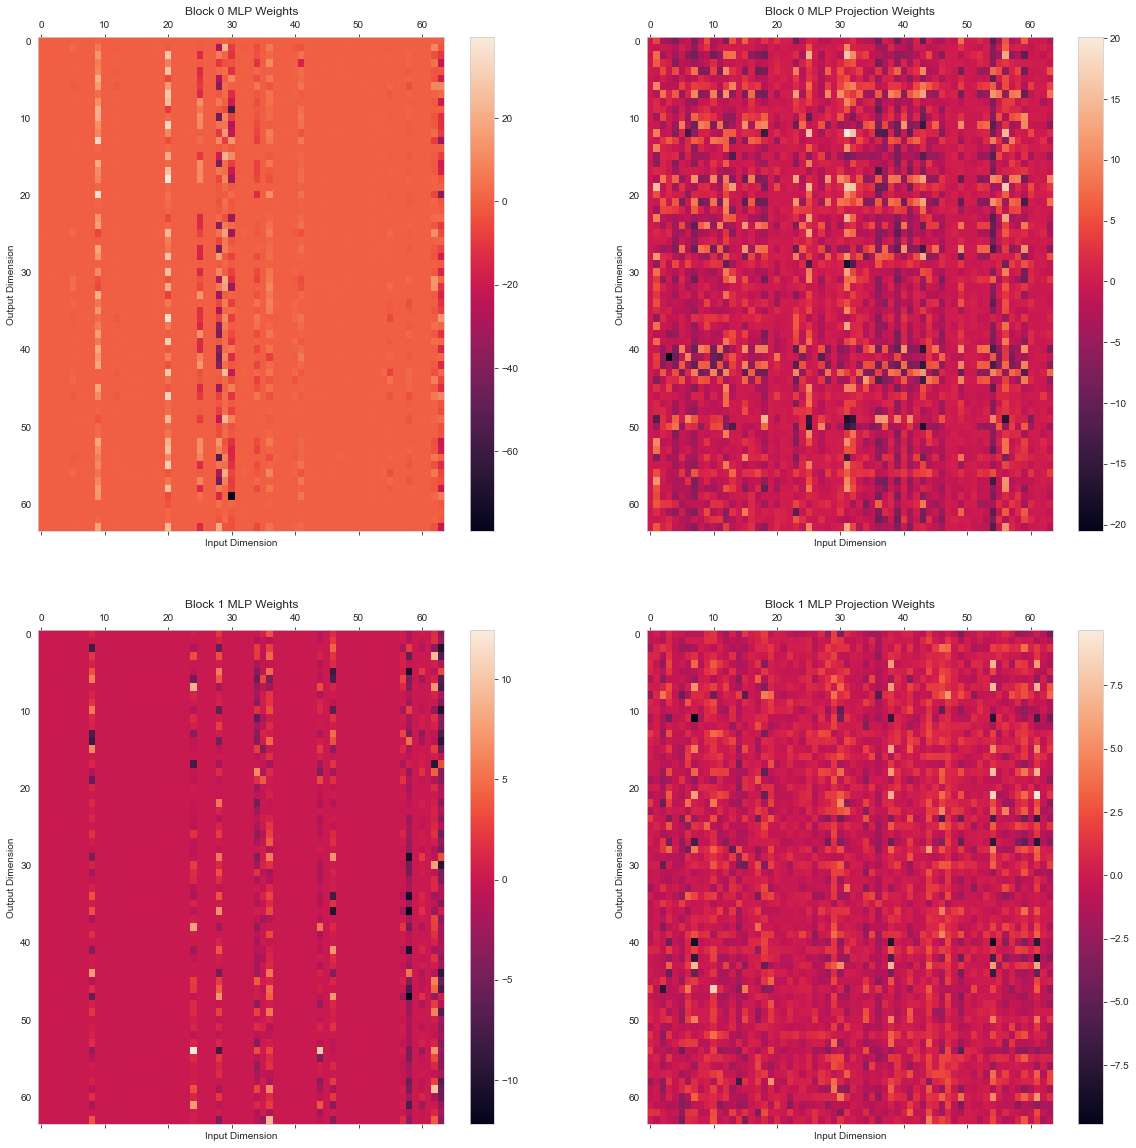

In [247]:
# Okay let's look at the last MLP
block0_mlp = run.model.token_sequence_transformer.blocks[0].compute[0]
block0_mlp_proj = run.model.token_sequence_transformer.blocks[0].compute[2]
block1_mlp = run.model.token_sequence_transformer.blocks[1].compute[0]
block1_mlp_proj = run.model.token_sequence_transformer.blocks[1].compute[2]

block0_mlp_weights = block0_mlp.weight.detach().cpu().numpy() * block0_ln1.detach().cpu().numpy()
block0_mlp_proj_weights = block0_mlp_proj.weight.detach().cpu().numpy() 
block1_mlp_weights = block1_mlp.weight.detach().cpu().numpy() * block1_ln1.detach().cpu().numpy()
block1_mlp_proj_weights = block1_mlp_proj.weight.detach().cpu().numpy()

block0_mlp_bias = block0_mlp.bias.detach().cpu().numpy()
block0_mlp_proj_bias = block0_mlp_proj.bias.detach().cpu().numpy()
block1_mlp_bias = block1_mlp.bias.detach().cpu().numpy()
block1_mlp_proj_bias = block1_mlp_proj.bias.detach().cpu().numpy()

# Matshow the last weights 

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

cax = axes[0, 0].matshow(block0_mlp_weights, aspect='auto')
axes[0, 0].set_title("Block 0 MLP Weights")
axes[0, 0].set_xlabel("Input Dimension")
axes[0, 0].set_ylabel("Output Dimension")
axes[0, 0].grid(False)
fig.colorbar(cax, ax=axes[0, 0])

cax = axes[0, 1].matshow(block0_mlp_proj_weights, aspect='auto')
axes[0, 1].set_title("Block 0 MLP Projection Weights")
axes[0, 1].set_xlabel("Input Dimension")
axes[0, 1].set_ylabel("Output Dimension")
axes[0, 1].grid(False)
fig.colorbar(cax, ax=axes[0, 1])

cax = axes[1, 0].matshow(block1_mlp_weights, aspect='auto')
axes[1, 0].set_title("Block 1 MLP Weights")
axes[1, 0].set_xlabel("Input Dimension")
axes[1, 0].set_ylabel("Output Dimension")
axes[1, 0].grid(False)
fig.colorbar(cax, ax=axes[1, 0])

cax = axes[1, 1].matshow(block1_mlp_proj_weights, aspect='auto')
axes[1, 1].set_title("Block 1 MLP Projection Weights")
axes[1, 1].set_xlabel("Input Dimension")
axes[1, 1].set_ylabel("Output Dimension")
axes[1, 1].grid(False)
fig.colorbar(cax, ax=axes[1, 1])

In [259]:
# Print ranks (tol=1e-1)

print("Block 0 MLP Weights Rank:", np.linalg.matrix_rank(block0_mlp_weights, tol=1e-1))
print("Block 0 MLP Projection Weights Rank:", np.linalg.matrix_rank(block0_mlp_proj_weights, tol=1e-1))
print("Block 1 MLP Weights Rank:", np.linalg.matrix_rank(block1_mlp_weights, tol=1e-1))
print("Block 1 MLP Projection Weights Rank:", np.linalg.matrix_rank(block1_mlp_proj_weights, tol=1e-1))

Block 0 MLP Weights Rank: 38
Block 0 MLP Projection Weights Rank: 63
Block 1 MLP Weights Rank: 19
Block 1 MLP Projection Weights Rank: 63


/Users/Jesse/Projects/icl/.venv/lib/python3.9/site-packages/matplotlib/transforms.py:762: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0, 0.5, 'Eigenvalue')

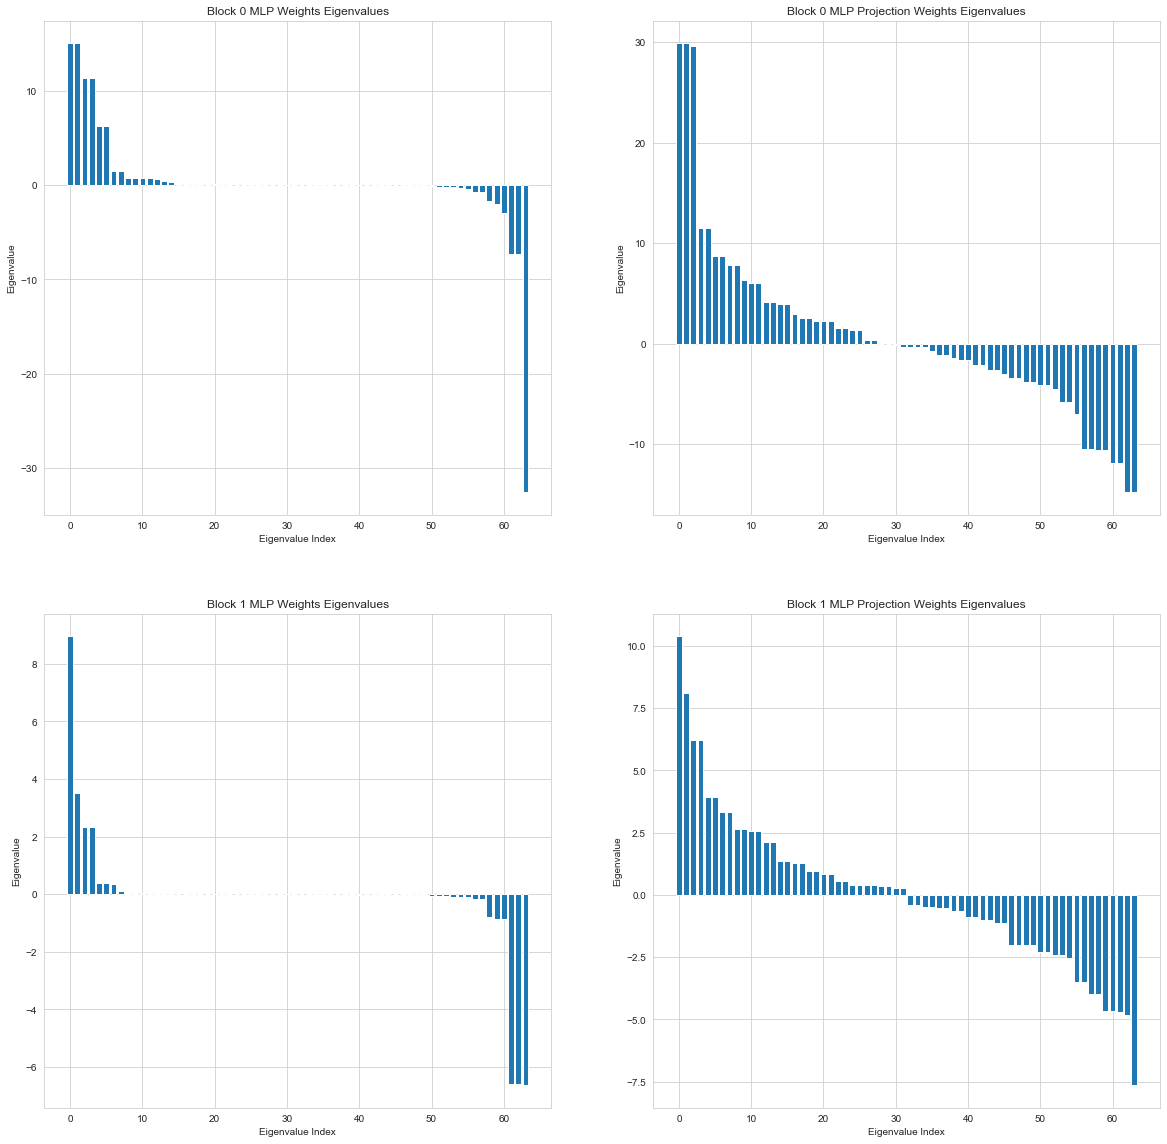

In [253]:
# Do eigenvalue decompositions and plot the eigenvalues in decreasing order

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

eigvals, eigvecs = np.linalg.eig(block0_mlp_weights)
eigvals = np.sort(eigvals)[::-1]
axes[0, 0].bar(range(len(eigvals)), eigvals)
axes[0, 0].set_title("Block 0 MLP Weights Eigenvalues")
axes[0, 0].set_xlabel("Eigenvalue Index")
axes[0, 0].set_ylabel("Eigenvalue")

eigvals, eigvecs = np.linalg.eig(block0_mlp_proj_weights)
eigvals = np.sort(eigvals)[::-1]
axes[0, 1].bar(range(len(eigvals)), eigvals)
axes[0, 1].set_title("Block 0 MLP Projection Weights Eigenvalues")
axes[0, 1].set_xlabel("Eigenvalue Index")
axes[0, 1].set_ylabel("Eigenvalue")

eigvals, eigvecs = np.linalg.eig(block1_mlp_weights)
eigvals = np.sort(eigvals)[::-1]
axes[1, 0].bar(range(len(eigvals)), eigvals)
axes[1, 0].set_title("Block 1 MLP Weights Eigenvalues")
axes[1, 0].set_xlabel("Eigenvalue Index")
axes[1, 0].set_ylabel("Eigenvalue")

eigvals, eigvecs = np.linalg.eig(block1_mlp_proj_weights)
eigvals = np.sort(eigvals)[::-1]
axes[1, 1].bar(range(len(eigvals)), eigvals)
axes[1, 1].set_title("Block 1 MLP Projection Weights Eigenvalues")
axes[1, 1].set_xlabel("Eigenvalue Index")
axes[1, 1].set_ylabel("Eigenvalue")


Text(0, 0.5, 'Output dim')

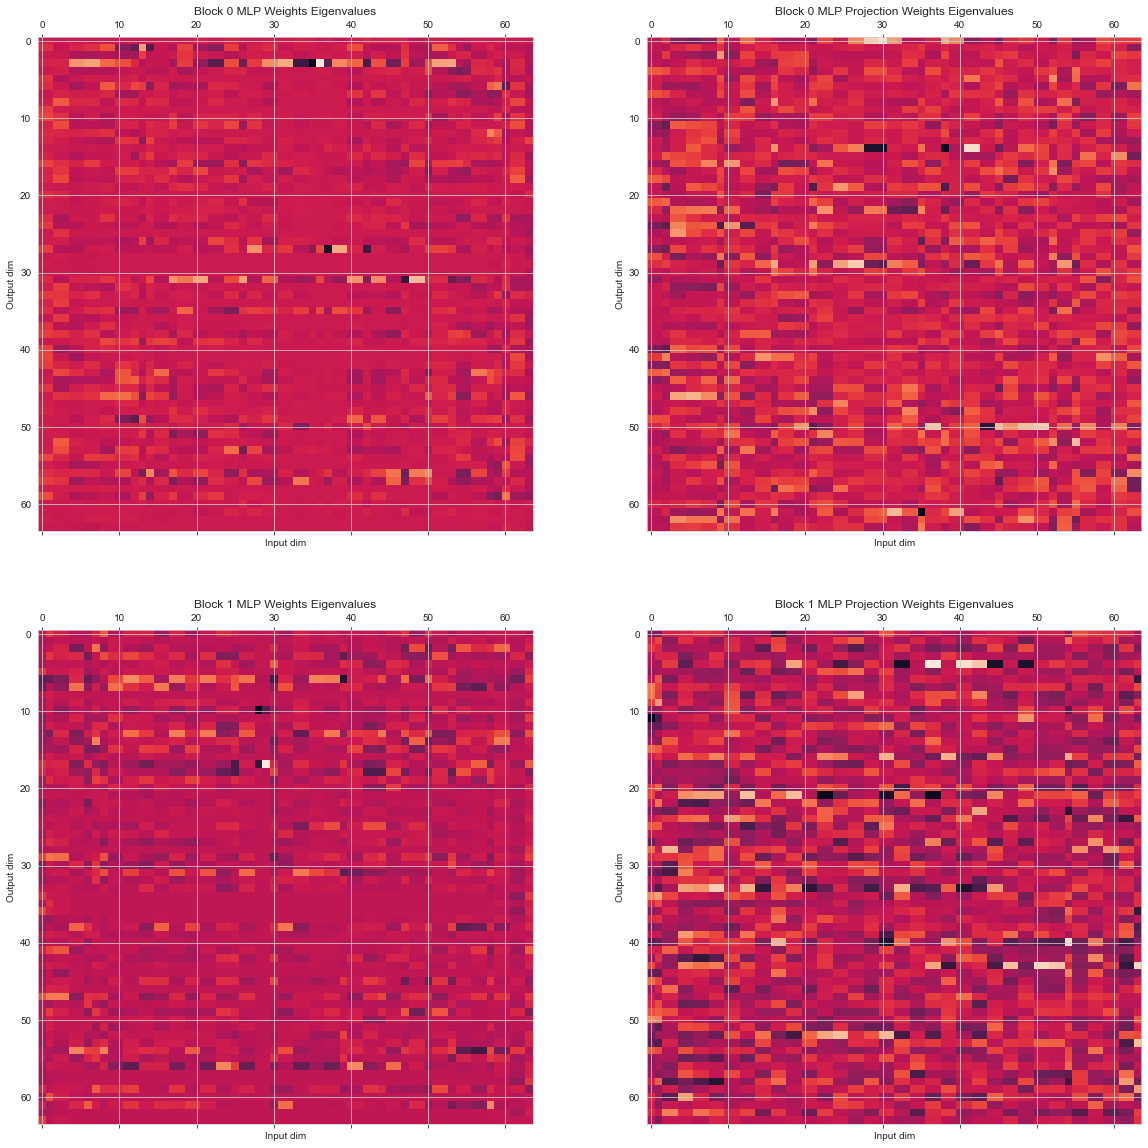

In [256]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

eigvals, eigvecs = np.linalg.eig(block0_mlp_weights)
eigval_idxs = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, eigval_idxs].real
axes[0, 0].matshow(eigvecs)
axes[0, 0].set_title("Block 0 MLP Weights Eigenvalues")
axes[0, 0].set_xlabel("Input dim")
axes[0, 0].set_ylabel("Output dim")

eigvals, eigvecs = np.linalg.eig(block0_mlp_proj_weights)
eigval_idxs = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, eigval_idxs].real
axes[0, 1].matshow(eigvecs)
axes[0, 1].set_title("Block 0 MLP Projection Weights Eigenvalues")
axes[0, 1].set_xlabel("Input dim")
axes[0, 1].set_ylabel("Output dim")

eigvals, eigvecs = np.linalg.eig(block1_mlp_weights)
eigval_idxs = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, eigval_idxs].real
axes[1, 0].matshow(eigvecs)
axes[1, 0].set_title("Block 1 MLP Weights Eigenvalues")
axes[1, 0].set_xlabel("Input dim")
axes[1, 0].set_ylabel("Output dim")

eigvals, eigvecs = np.linalg.eig(block1_mlp_proj_weights)
eigval_idxs = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, eigval_idxs].real
axes[1, 1].matshow(eigvecs)
axes[1, 1].set_title("Block 1 MLP Projection Weights Eigenvalues")
axes[1, 1].set_xlabel("Input dim")
axes[1, 1].set_ylabel("Output dim")

Text(0, 0.5, 'Weight')

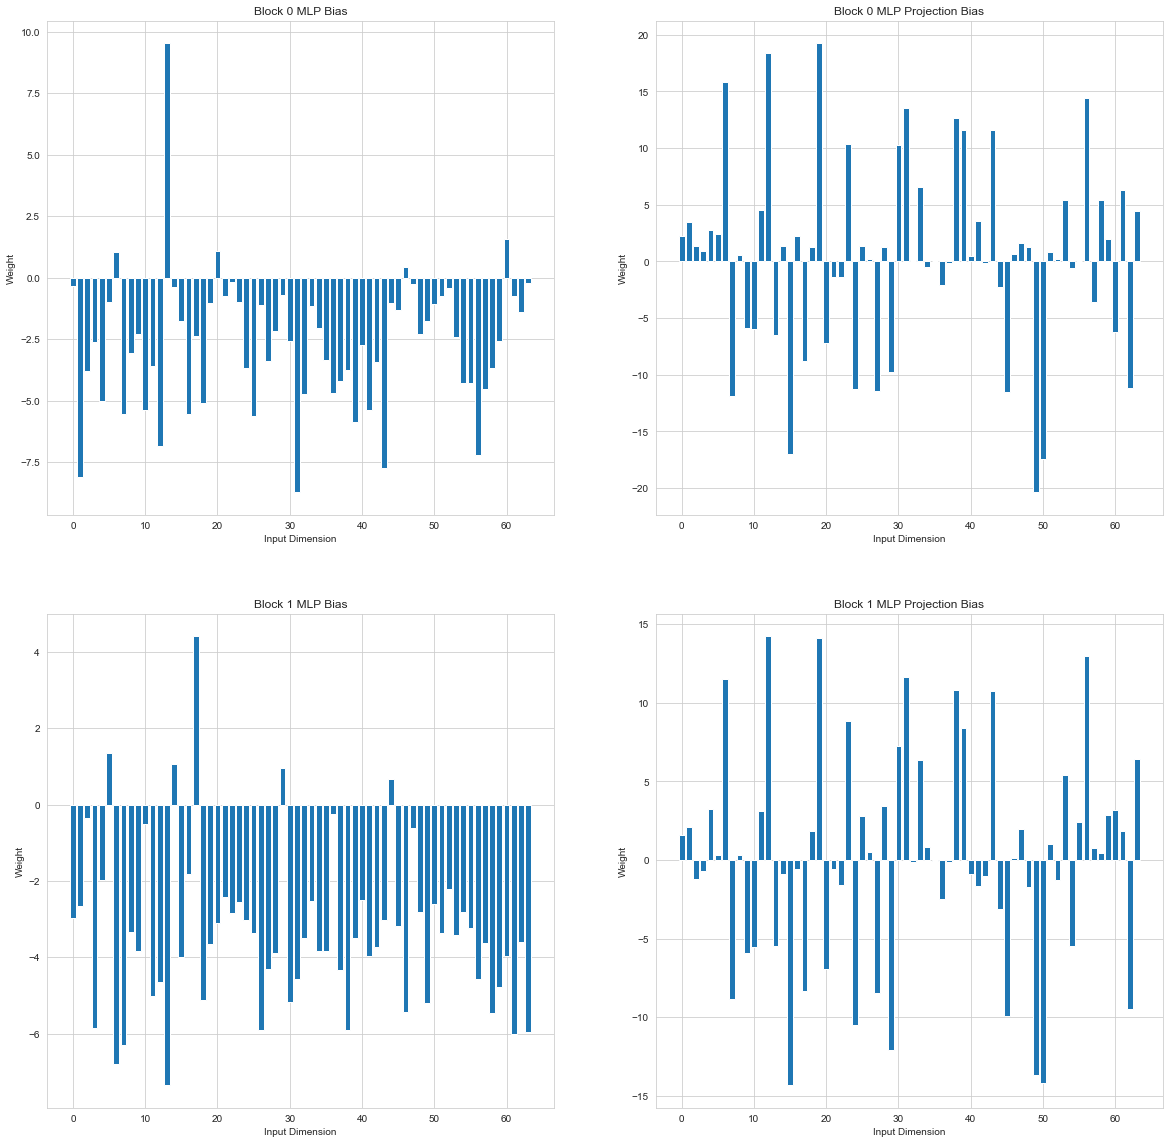

In [250]:
# Bars for the bias

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0, 0].bar(range(len(block0_mlp_bias)), block0_mlp_bias)
axes[0, 0].set_title("Block 0 MLP Bias")
axes[0, 0].set_xlabel("Input Dimension")
axes[0, 0].set_ylabel("Weight")

axes[0, 1].bar(range(len(block0_mlp_proj_bias)), block0_mlp_proj_bias)
axes[0, 1].set_title("Block 0 MLP Projection Bias")
axes[0, 1].set_xlabel("Input Dimension")
axes[0, 1].set_ylabel("Weight")

axes[1, 0].bar(range(len(block1_mlp_bias)), block1_mlp_bias)
axes[1, 0].set_title("Block 1 MLP Bias")
axes[1, 0].set_xlabel("Input Dimension")
axes[1, 0].set_ylabel("Weight")

axes[1, 1].bar(range(len(block1_mlp_proj_bias)), block1_mlp_proj_bias)
axes[1, 1].set_title("Block 1 MLP Projection Bias")
axes[1, 1].set_xlabel("Input Dimension")
axes[1, 1].set_ylabel("Weight")

In [341]:
# Okay I want to actually figure out what the slope is of that line. I realize I've been thinking of the two tasks as orthogonal this entire time when clearly they aren't. 

# Let's find an orthonormal basis in the plane spanned by the two tasks.

task_basis = torch.stack([tasks[0], tasks[1]]).T

task_basis[:, 0] = task_basis[:, 0] / task_basis[:, 0].norm()
task_basis[:, 1] = task_basis[:, 1] - task_basis[:, 1].dot(task_basis[:, 0]) * task_basis[:, 0]
task_basis[:, 1] = task_basis[:, 1] / task_basis[:, 1].norm()

task_basis_np = task_basis.detach().cpu().numpy()

[-5.8970194 11.030293 ] [ 9.1281185 -6.6843805] [-0.9210677 -0.4745723  9.27699   -5.9636183]


<ipython-input-377-21b1146029fa>:20: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



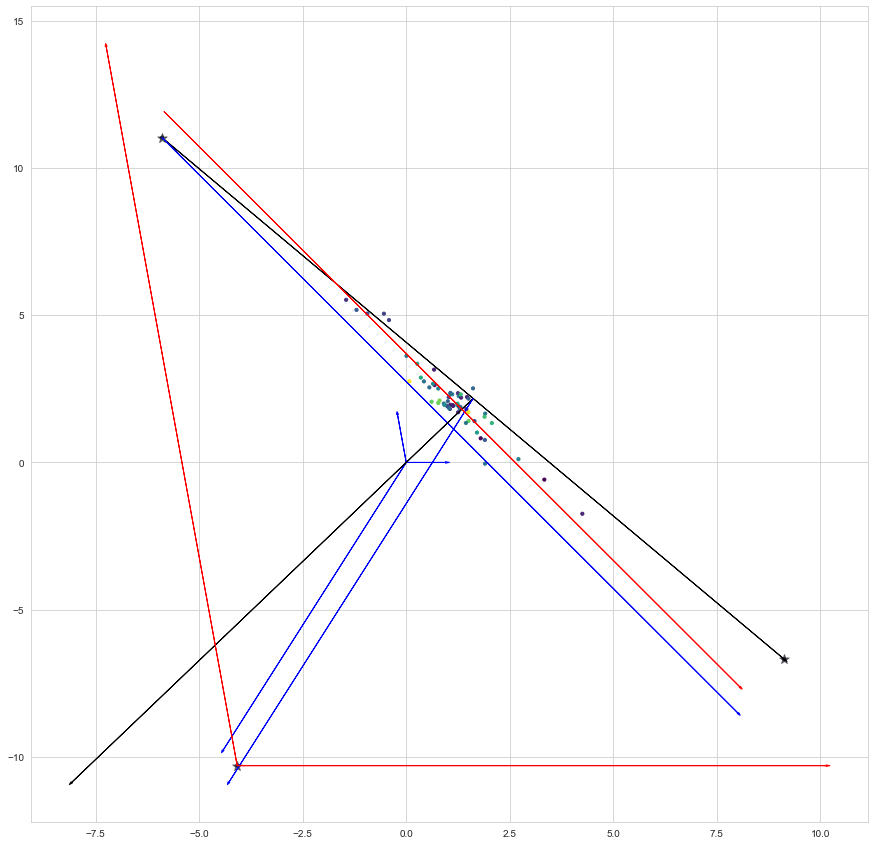

In [377]:
# First plot the tasks in this basis

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

task0_decomp = task_basis_np.T @ tasks[0].detach().cpu().numpy()
task1_decomp = task_basis_np.T @ tasks[1].detach().cpu().numpy()

delta_task_decomp = - task1_decomp + task0_decomp
sum_task_decomp = task1_decomp + task0_decomp

# Using arrows

ax.arrow(0, 0, task0_decomp[0], task0_decomp[1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')
ax.arrow(0, 0, task1_decomp[0], task1_decomp[1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')

embed = embedding_matrices[-1]
_x_embeds = embed[:, 1:].to("mps")
projection_matrix = task_basis
projected_embeds = torch.matmul(_x_embeds, projection_matrix)
reembedded_projections = torch.matmul(torch.tensor(projected_embeds), projection_matrix.T)
projected_embeds = projected_embeds.detach().cpu().numpy()
dist_from_proj = np.linalg.norm(_x_embeds.detach().cpu().numpy() - reembedded_projections.detach().cpu().numpy(), axis=1)
    
ax.scatter(projected_embeds[:, 0], projected_embeds[:, 1], c=dist_from_proj, cmap="viridis", s=10)

task_line_endpoint_decomp0 = projected_embeds[np.argmin(np.linalg.norm(projected_embeds - np.array([-6, 10]), axis=1))]

# Find the point closest to 9, -13
task_line_endpoint_decomp1 = projected_embeds[np.argmin(np.linalg.norm(projected_embeds - np.array([8, -6]), axis=1))]

# Find the orthogonal point close to -15, -4
task_line_orthogonal_decomp = projected_embeds[np.argmin(np.linalg.norm(projected_embeds - np.array([-4, -10]), axis=1))]


print(task_line_endpoint_decomp0, task_line_endpoint_decomp1, task_line_orthogonal)


# Plot these points with special shapes
ax.scatter(task_line_endpoint_decomp0[0], task_line_endpoint_decomp0[1], marker="*", s=100, c="k", alpha=.5)
ax.scatter(task_line_endpoint_decomp1[0], task_line_endpoint_decomp1[1], marker="*", s=100, c="k", alpha=.5)
ax.scatter(task_line_orthogonal_decomp[0], task_line_orthogonal_decomp[1], marker="*", s=100, c="k", alpha=.5)

ax.arrow(task_line_endpoint_decomp0[0].item(), task_line_endpoint_decomp0[1].item(), task_line_endpoint_decomp1[0].item() - task_line_endpoint_decomp0[0].item(), task_line_endpoint_decomp1[1].item() - task_line_endpoint_decomp0[1].item(), head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(task_line_endpoint_decomp0[0], task_line_endpoint_decomp0[1], delta_task_decomp[0]* 12, delta_task_decomp[1] * 12, head_width=0.05, head_length=0.1, fc='blue', ec='blue')

ax.arrow(0, 0, sum_task_decomp[0] * -6, sum_task_decomp[1] * -6, head_width=0.05, head_length=0.1, fc='blue', ec='blue')

task_line_midpoint = (task_line_endpoint_decomp0 + task_line_endpoint_decomp1) / 2
ax.arrow(task_line_midpoint[0], task_line_midpoint[1], -task_line_midpoint[0] * 6, -task_line_midpoint[1] * 6, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(task_line_midpoint[0], task_line_midpoint[1], sum_task_decomp[0] * -8, sum_task_decomp[1] * -8, head_width=0.05, head_length=0.1, fc='blue', ec='blue')


centroid = (projected_embeds.mean(axis=0) * 64 - task_line_orthogonal_decomp) / 63
ax.arrow(centroid[0] - delta_task_decomp[0]* 6, centroid[1] - delta_task_decomp[1]* 6, delta_task_decomp[0]* 12, delta_task_decomp[1] * 12, head_width=0.05, head_length=0.1, fc='red', ec='red')

ax.arrow(task_line_orthogonal_decomp[0], task_line_orthogonal_decomp[1], task0_decomp[0] * 15, task0_decomp[1] * 15, head_width=0.05, head_length=0.1, fc='red', ec='red')
ax.arrow(task_line_orthogonal_decomp[0], task_line_orthogonal_decomp[1], task1_decomp[0] * 15, task1_decomp[1] * 15, head_width=0.05, head_length=0.1, fc='red', ec='red')
plt.show()



tensor(0.2943, device='mps:0', grad_fn=<DivBackward0>)
tensor([[[ 0.9373],
         [-1.2660],
         [ 0.7107],
         [-0.6805],
         [-0.5675],
         [-0.5355],
         [-0.6120],
         [ 0.3257]]], device='mps:0', grad_fn=<SliceBackward0>)
tensor([[[-0.2398],
         [-1.2613],
         [ 0.7125],
         [-0.6751],
         [-0.5643],
         [-0.5250],
         [-0.6075],
         [ 0.3316]]], device='mps:0')


tensor(0.2936, device='mps:0', grad_fn=<DivBackward0>)
tensor([[[ 0.9373],
         [-1.7408],
         [ 0.8878],
         [-0.0578],
         [-0.4713],
         [ 1.8462],
         [-0.4373],
         [ 0.9938]]], device='mps:0', grad_fn=<SliceBackward0>)
tensor([[[ 2.1119],
         [-1.7419],
         [ 0.8873],
         [-0.0596],
         [-0.4721],
         [ 1.8435],
         [-0.4394],
         [ 0.9907]]], device='mps:0')


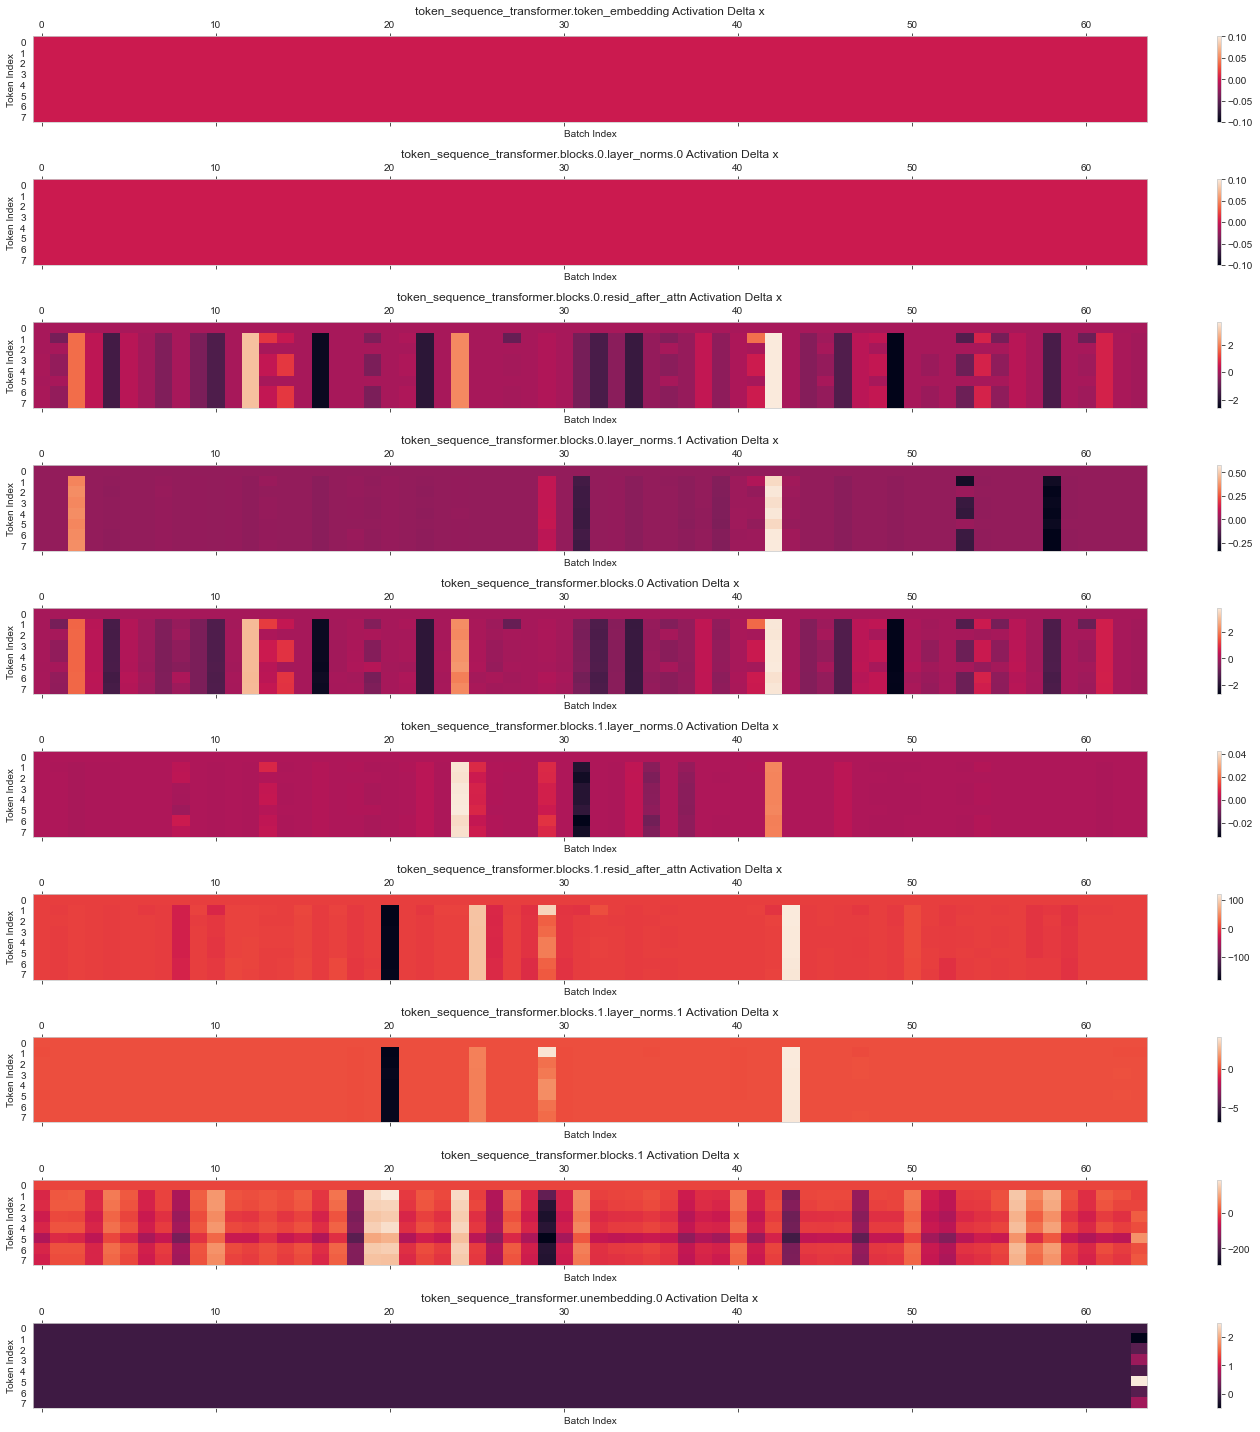

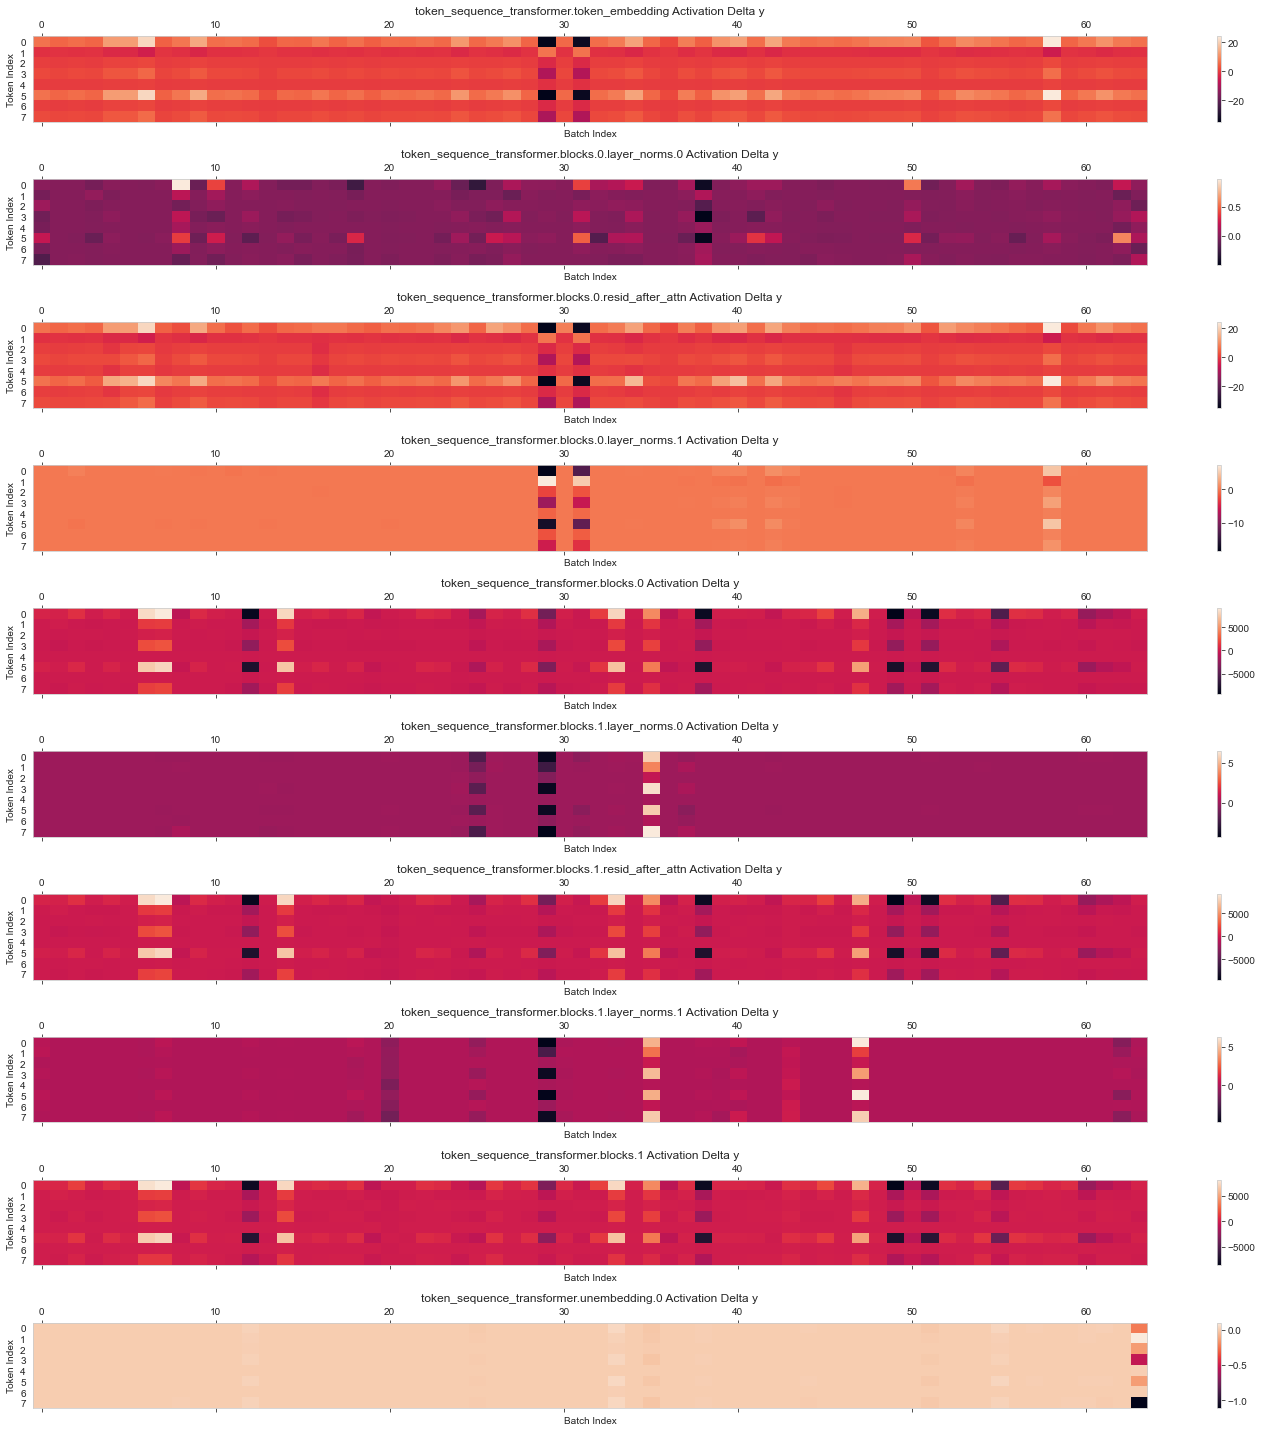

In [405]:
# Alright I want to compare the activations in the residual stream between the two tasks.

hooked_model = hook(run.model)

x0s = [torch.randn(4, device="mps") for _ in range(8)]
activations = []

for w in tasks:
    ys = []
    for x in x0s:
        ys.append(w @ x)

    xs = torch.stack(x0s).unsqueeze(0)
    ys = torch.stack(ys).unsqueeze(0).unsqueeze(-1)

    predictions, cache = hooked_model.run_with_cache(xs, ys)
    activations.append(cache)

    print("\n")
    print((predictions - ys).norm() / 4)
    print(predictions)
    print(ys)

layers = [
    "token_sequence_transformer.token_embedding",
    "token_sequence_transformer.blocks.0.layer_norms.0",
    "token_sequence_transformer.blocks.0.resid_after_attn",
    "token_sequence_transformer.blocks.0.layer_norms.1",
    "token_sequence_transformer.blocks.0",
    "token_sequence_transformer.blocks.1.layer_norms.0",
    "token_sequence_transformer.blocks.1.resid_after_attn",
    "token_sequence_transformer.blocks.1.layer_norms.1",
    "token_sequence_transformer.blocks.1",
    "token_sequence_transformer.unembedding.0"       
]

activation_deltas = [
    (activations[0][layer] - activations[1][layer])[0]
    for layer in layers
]


for x_or_y in range(2):
    fig, axes = plt.subplots(len(activation_deltas), figsize=(20, 20))

    for i, (layer, delta) in enumerate(zip(layers, activation_deltas)):
        subdelta = delta[x_or_y::2, task_line_ordering]
        cax = axes[i].matshow(subdelta.detach().cpu().numpy(), aspect='auto')
        axes[i].set_title(f"{layer} Activation Delta {'x' if x_or_y == 0 else 'y'}")
        axes[i].set_xlabel("Batch Index")
        axes[i].set_ylabel("Token Index")
        axes[i].grid(False)
        fig.colorbar(cax, ax=axes[i])
        

    plt.tight_layout()
    plt.show()

In [87]:
from icl.tasks import apply_transformations

# I'd like to see how close the model gets to predicting the centroid of the two tasks as a function of steps and tokens. 
B = 2048
K = 8
D = 4
DEVICE = "mps"
datasets = []

task_avg = (tasks[0] + tasks[1] + tasks[2] + tasks[3]) / 4

task_combo_idxs = [(i, j) for i in range(3) for j in range(i+1, 4)]

task_combos = [
    (tasks[i] + tasks[j]) / 2 for i, j in task_combo_idxs
]

for i, task in enumerate(tasks):
    ws = task.unsqueeze(0).repeat(B, 1, 1)
    wmids = task_avg.unsqueeze(0).repeat(B, 1, 1)

    other_combos = [
        task_combo.unsqueeze(0).repeat(B, 1, 1)
        for task_combo in task_combos
    ]

    # sample i.i.d. inputs and outputs for each task according to the
    # regression model
    xs = torch.normal(
        mean=0.,
        std=1.,
        size=(B, K, D,),
        device=DEVICE,
    )

    ys = apply_transformations(ws, xs, 0., DEVICE)
    ymids = apply_transformations(wmids, xs, 0., DEVICE)
    other_ys = [
        apply_transformations(task_combo, xs, 0., DEVICE)
        for task_combo in other_combos
    ]

    datasets.append((xs, ys, ymids, other_ys))

In [ ]:
pred_distances = pd.DataFrame(columns=["step", "mse", "delta_mid"] + [f"token_{i}/mse" for i in range(8)] + [f"token_{i}/delta_mid" for i in range(8)])

for step, model in zip(run.checkpointer.file_ids, models):
    for i, (xs, ys, ymids, other_ys) in enumerate(datasets):
        yhats = model(xs, ys)
        mse_per_token = ((yhats - ys) ** 2).mean(dim=0).mean(dim=-1)
        mse = mse_per_token.mean()

        delta_mid_per_token = ((yhats - ymids) ** 2).mean(dim=0).mean(dim=-1)
        delta_mid = delta_mid_per_token.mean()

        other_deltas_per_token = {
            (j, k): ((yhats - other_y) ** 2).mean(dim=0).mean(dim=-1)
            for (j, k), other_y in zip(task_combo_idxs, other_ys)
            if j == i or k == i
        }
        other_deltas = {
            (j, k): other_deltas_per_token[(j, k)].mean()
            for (j, k), other_y in zip(task_combo_idxs, other_ys)
            if j == i or k == i
        }

        pred_distances = pred_distances.append({
            "step": step + 1,
            "mse": mse.item(),
            "delta_mid": delta_mid.item(),
            **{f"delta_mid/{j}_{k}": other_deltas[(j, k)].item() for j, k in task_combo_idxs if j == i or k == i},
            **{f"token_{t}/mse": mse_per_token[t].item() for t in range(8)},
            **{f"token_{t}/delta_mid": delta_mid_per_token[t].item() for t in range(8)},
            **{f"token_{t}/delta_mid/{j}_{k}": other_deltas_per_token[(j, k)][t].item() for j, k in task_combo_idxs for t in range(8) if j == i or k == i},
            "task": i
        }, ignore_index=True)
                

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

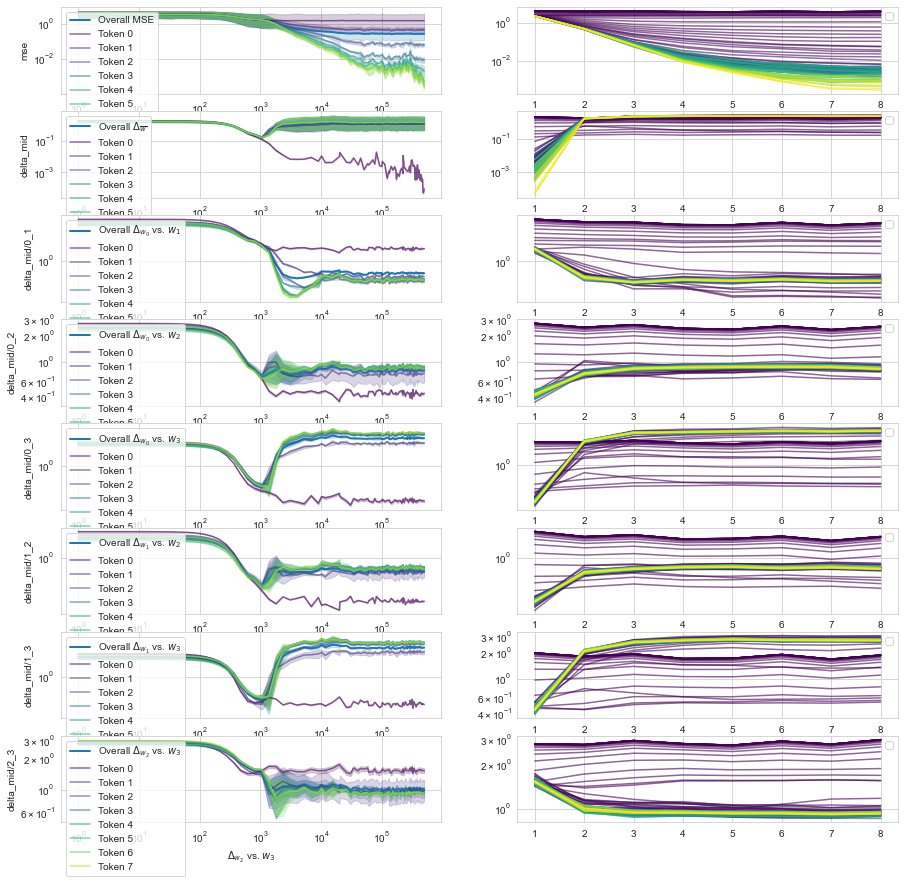

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = ['mse', 'delta_mid'] + [f"delta_mid/{j}_{k}" for j, k in task_combo_idxs]
labels = {"mse": "MSE", "delta_mid": "$\Delta_{\overline{w}}$"} | {f"delta_mid/{j}_{k}": f"$\Delta_{{w_{{{j}}}} vs. $w_{{{k}}}}$" for j, k in task_combo_idxs}

# Generate 2x2 subplots
fig, axes = plt.subplots(len(metrics), 2, figsize=(15, 5 * len(metrics)))

for ax in axes:
    for subax in ax:
        subax.grid(True)
        subax.set_yscale('log')

# Flatten the axes for easier iteration
flat_axes = axes.flatten()

# Use viridis colormap
cmap = plt.cm.viridis

norm = plt.Normalize(pred_distances['step'].min(), pred_distances['step'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for i, metric in enumerate(metrics):
    # First column: step on x-axis
    sns.lineplot(data=pred_distances, x='step', y=metric, ax=flat_axes[i * 2], label=f'Overall {labels[metric]}', linewidth=2)
    for token in range(8):
        sns.lineplot(data=pred_distances, x='step', y=f'token_{token}/{metric}', ax=flat_axes[i * 2], label=f'Token {token}', alpha=0.6, color=cmap(token / 8))
    flat_axes[i * 2].set_xscale('log')
    flat_axes[i * 2].set_xlabel("Steps")
    flat_axes[i * 2].set_xlabel(labels[metric])

    # Second column: token on x-axis
    for step in pred_distances['step'].unique():
        subset = pred_distances[pred_distances['step'] == step]
        ys = [subset[f'token_{token}/{metric}'].mean() for token in range(8)]
        sns.lineplot(x=range(1, 9), y=ys, ax=flat_axes[i * 2 + 1], alpha=0.6, color=cmap(norm(step)))

# Add legends and titles
for ax in flat_axes:
    ax.legend()

for i in range(len(metrics)):
    plt.colorbar(sm, ax=axes[0, metrics], label="Step")


flat_axes[0].set_title("MSE by Steps")
flat_axes[1].set_title("MSE by Tokens")
flat_axes[2].set_title("$\Delta_{\overline{w}}$ by Steps")
flat_axes[3].set_title("$\Delta_{\overline{w}}$ by Tokens")

fig.set_facecolor('white')

plt.show()

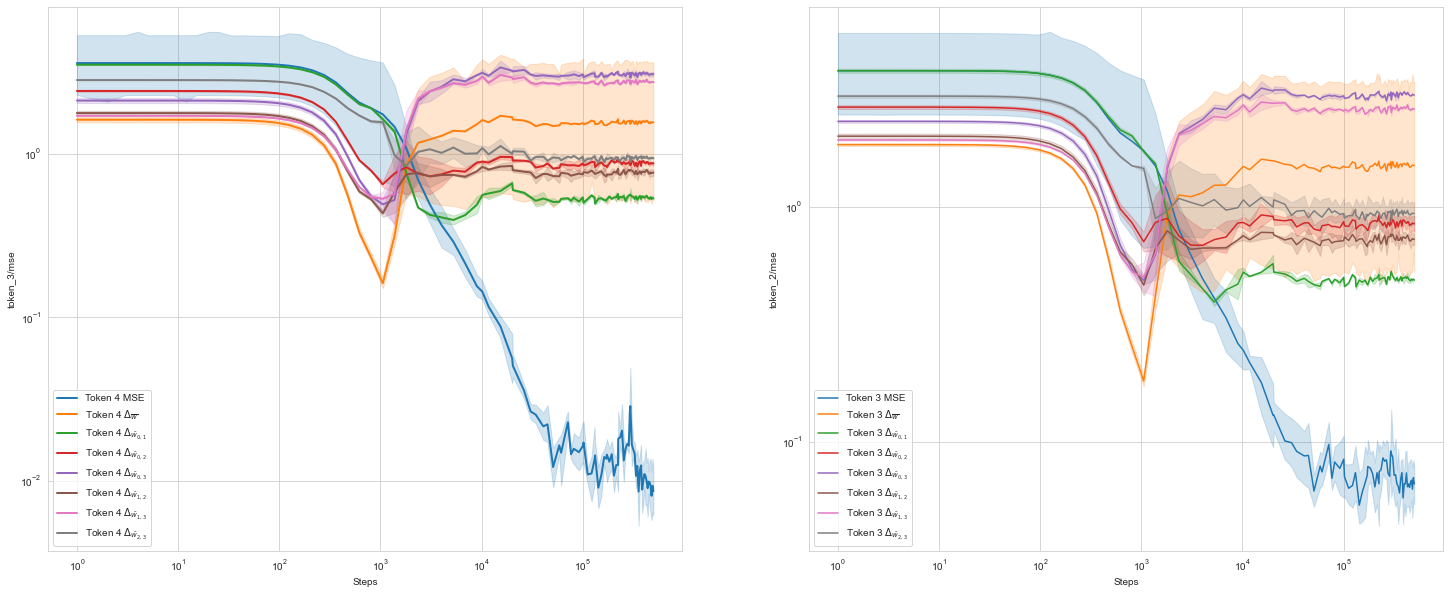

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

labels = {"mse": "MSE", "delta_mid": "$\Delta_{\overline{w}}$"} | {f"delta_mid/{j}_{k}": f"$\Delta_{{\\bar{{w}}_{{{j},{k}}}}}$" for j, k in task_combo_idxs}

# Generate 2x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

for ax in axes:
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel("Steps")

# Use viridis colormap
cmap = plt.cm.viridis

for i, metric in enumerate(metrics):
    # First column: step on x-axis
    sns.lineplot(data=pred_distances, x='step', y=metric, ax=axes[0], label=f'Overall {labels[metric]}', linewidth=2)
    sns.lineplot(data=pred_distances, x='step', y=f'token_{7}/{metric}', ax=axes[1], label=f'Last token {labels[metric]}')

for ax in axes:
    ax.legend()

fig.set_facecolor('white')
plt.show()

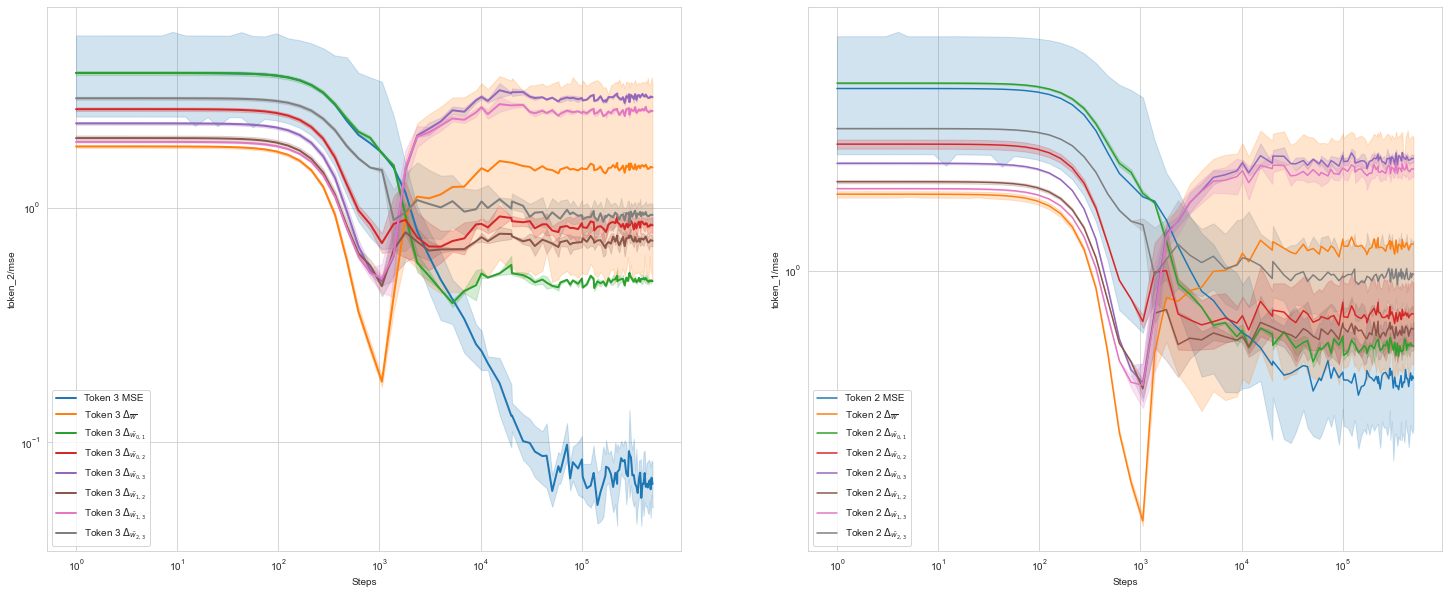

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

labels = {"mse": "MSE", "delta_mid": "$\Delta_{\overline{w}}$"} | {f"delta_mid/{j}_{k}": f"$\Delta_{{\\bar{{w}}_{{{j},{k}}}}}$" for j, k in task_combo_idxs}

# Generate 2x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

for ax in axes:
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel("Steps")

# Use viridis colormap
cmap = plt.cm.viridis

for i, metric in enumerate(metrics):
    # First column: step on x-axis
    sns.lineplot(data=pred_distances, x='step', y=f'token_{1}/{metric}', ax=axes[1], label=f'Token 2 {labels[metric]}')
    sns.lineplot(data=pred_distances, x='step', y=f'token_{2}/{metric}', ax=axes[0], label=f'Token 3 {labels[metric]}', linewidth=2)

for ax in axes:
    ax.legend()

fig.set_facecolor('white')
plt.show()